# DATA 4950 Project
## NASA

In [1]:
# Import Required Libraries
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [2]:
# Define common headers
common_headers = [
    'unit_number',
    'time_in_cycles',
    'operational_setting_1',
    'operational_setting_2',
    'operational_setting_3',
]

# Define the number of sensor measurements
num_sensor_measurements = 26

# Generate headers for sensor measurements
sensor_measurement_headers = [f'sensor_measurement_{i}' for i in range(1, num_sensor_measurements + 1)]
headers = common_headers + sensor_measurement_headers

In [3]:
# Read in the different train and test sets
df1 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\train_FD001.txt", sep=' ', header=None, names=headers)
df1t = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\test_FD001.txt", sep=' ', header=None, names=headers)
df2 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\train_FD002.txt", sep=' ', header=None, names=headers)
df2t = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\test_FD002.txt", sep=' ', header=None, names=headers)
df3 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\train_FD003.txt", sep=' ', header=None, names=headers)
df3t = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\test_FD003.txt", sep=' ', header=None, names=headers)
df4 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\train_FD004.txt", sep=' ', header=None, names=headers)
df4t = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\test_FD004.txt", sep=' ', header=None, names=headers)

In [4]:
# Read in the true RUL vector set for each test set
dfr1 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\RUL_FD001.txt", header=None, names=['remaining_cycles'])
dfr2 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\RUL_FD002.txt", header=None, names=['remaining_cycles'])
dfr3 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\RUL_FD003.txt", header=None, names=['remaining_cycles'])
dfr4 = pd.read_csv(r"C:\Users\Katabatic\Desktop\4950\Data\RUL_FD004.txt", header=None, names=['remaining_cycles'])

## Obtaining .info() for each df and dropping columns that contain no values.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  float64
 15  se

In [6]:
df1.head()

unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 -0.001                 -0.000   
1            1               2                  0.002                 -0.000   
2            1               3                 -0.004                  0.000   
3            1               4                  0.001                  0.000   
4            1               5                 -0.002                 -0.000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                100.000               518.670               641.820   
1                100.000               518.670               642.150   
2                100.000               518.670               642.350   
3                100.000               518.670               642.350   
4                100.000               518.670               642.370   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  \
0              1589.700              1400.600                14.620   
1              1591.820              1403.140                14.620   
2              1587.990              1404.200                14.620   
3              1582.790              1401.870                14.620   
4              1582.850              1406.220                14.620   

   sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  \
0                21.610               554.360              2388.060   
1                21.610               553.750              2388.040   
2                21.610               554.260              2388.080   
3                21.610               554.450              2388.110   
4                21.610               554.000              2388.060   

   sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  \
0              9046.190                  1.300                 47.470   
1              9044.070                  1.300                 47.490   
2              9052.940                  1.300                 47.270   
3              9049.480                  1.300                 47.130   
4              9055.150                  1.300                 47.280   

   sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                521.660               2388.020               8138.620   
1                522.280               2388.070               8131.490   
2                522.420               2388.030               8133.230   
3                522.860               2388.080               8133.830   
4                522.190               2388.040               8133.800   

   sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  \
0                  8.419                  0.030                    392   
1                  8.432                  0.030                    392   
2                  8.418                  0.030                    390   
3                  8.368                  0.030                    392   
4                  8.429                  0.030                    393   

   sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
0                   2388                100.000                 39.060   
1                   2388                100.000                 39.000   
2                   2388                100.000                 38.950   
3                   2388                100.000                 38.880   
4                   2388                100.000                 38.900   

   sensor_measurement_21  sensor_measurement_22  sensor_measurement_23  \
0                 23.419                    NaN                    NaN   
1                 23.424                    NaN                    NaN   
2                 23.344                    NaN                    NaN   
3                 23.374                    NaN                    NaN   
4                 23.404                    NaN                    NaN   

   sensor_measur

In [7]:
# dropping columns that have no value
df1.dropna(axis=1, how='all', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  float64
 15  se

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            53759 non-null  int64  
 1   time_in_cycles         53759 non-null  int64  
 2   operational_setting_1  53759 non-null  float64
 3   operational_setting_2  53759 non-null  float64
 4   operational_setting_3  53759 non-null  float64
 5   sensor_measurement_1   53759 non-null  float64
 6   sensor_measurement_2   53759 non-null  float64
 7   sensor_measurement_3   53759 non-null  float64
 8   sensor_measurement_4   53759 non-null  float64
 9   sensor_measurement_5   53759 non-null  float64
 10  sensor_measurement_6   53759 non-null  float64
 11  sensor_measurement_7   53759 non-null  float64
 12  sensor_measurement_8   53759 non-null  float64
 13  sensor_measurement_9   53759 non-null  float64
 14  sensor_measurement_10  53759 non-null  float64
 15  se

In [9]:
# Same drop as before
df2.dropna(axis=1, how='all', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            53759 non-null  int64  
 1   time_in_cycles         53759 non-null  int64  
 2   operational_setting_1  53759 non-null  float64
 3   operational_setting_2  53759 non-null  float64
 4   operational_setting_3  53759 non-null  float64
 5   sensor_measurement_1   53759 non-null  float64
 6   sensor_measurement_2   53759 non-null  float64
 7   sensor_measurement_3   53759 non-null  float64
 8   sensor_measurement_4   53759 non-null  float64
 9   sensor_measurement_5   53759 non-null  float64
 10  sensor_measurement_6   53759 non-null  float64
 11  sensor_measurement_7   53759 non-null  float64
 12  sensor_measurement_8   53759 non-null  float64
 13  sensor_measurement_9   53759 non-null  float64
 14  sensor_measurement_10  53759 non-null  float64
 15  se

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            24720 non-null  int64  
 1   time_in_cycles         24720 non-null  int64  
 2   operational_setting_1  24720 non-null  float64
 3   operational_setting_2  24720 non-null  float64
 4   operational_setting_3  24720 non-null  float64
 5   sensor_measurement_1   24720 non-null  float64
 6   sensor_measurement_2   24720 non-null  float64
 7   sensor_measurement_3   24720 non-null  float64
 8   sensor_measurement_4   24720 non-null  float64
 9   sensor_measurement_5   24720 non-null  float64
 10  sensor_measurement_6   24720 non-null  float64
 11  sensor_measurement_7   24720 non-null  float64
 12  sensor_measurement_8   24720 non-null  float64
 13  sensor_measurement_9   24720 non-null  float64
 14  sensor_measurement_10  24720 non-null  float64
 15  se

In [11]:
# Same drop as before
df3.dropna(axis=1, how='all', inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            24720 non-null  int64  
 1   time_in_cycles         24720 non-null  int64  
 2   operational_setting_1  24720 non-null  float64
 3   operational_setting_2  24720 non-null  float64
 4   operational_setting_3  24720 non-null  float64
 5   sensor_measurement_1   24720 non-null  float64
 6   sensor_measurement_2   24720 non-null  float64
 7   sensor_measurement_3   24720 non-null  float64
 8   sensor_measurement_4   24720 non-null  float64
 9   sensor_measurement_5   24720 non-null  float64
 10  sensor_measurement_6   24720 non-null  float64
 11  sensor_measurement_7   24720 non-null  float64
 12  sensor_measurement_8   24720 non-null  float64
 13  sensor_measurement_9   24720 non-null  float64
 14  sensor_measurement_10  24720 non-null  float64
 15  se

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            61249 non-null  int64  
 1   time_in_cycles         61249 non-null  int64  
 2   operational_setting_1  61249 non-null  float64
 3   operational_setting_2  61249 non-null  float64
 4   operational_setting_3  61249 non-null  float64
 5   sensor_measurement_1   61249 non-null  float64
 6   sensor_measurement_2   61249 non-null  float64
 7   sensor_measurement_3   61249 non-null  float64
 8   sensor_measurement_4   61249 non-null  float64
 9   sensor_measurement_5   61249 non-null  float64
 10  sensor_measurement_6   61249 non-null  float64
 11  sensor_measurement_7   61249 non-null  float64
 12  sensor_measurement_8   61249 non-null  float64
 13  sensor_measurement_9   61249 non-null  float64
 14  sensor_measurement_10  61249 non-null  float64
 15  se

In [13]:
# Same drop as before
df4.dropna(axis=1, how='all', inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            61249 non-null  int64  
 1   time_in_cycles         61249 non-null  int64  
 2   operational_setting_1  61249 non-null  float64
 3   operational_setting_2  61249 non-null  float64
 4   operational_setting_3  61249 non-null  float64
 5   sensor_measurement_1   61249 non-null  float64
 6   sensor_measurement_2   61249 non-null  float64
 7   sensor_measurement_3   61249 non-null  float64
 8   sensor_measurement_4   61249 non-null  float64
 9   sensor_measurement_5   61249 non-null  float64
 10  sensor_measurement_6   61249 non-null  float64
 11  sensor_measurement_7   61249 non-null  float64
 12  sensor_measurement_8   61249 non-null  float64
 13  sensor_measurement_9   61249 non-null  float64
 14  sensor_measurement_10  61249 non-null  float64
 15  se

In [14]:
df1t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            13096 non-null  int64  
 1   time_in_cycles         13096 non-null  int64  
 2   operational_setting_1  13096 non-null  float64
 3   operational_setting_2  13096 non-null  float64
 4   operational_setting_3  13096 non-null  float64
 5   sensor_measurement_1   13096 non-null  float64
 6   sensor_measurement_2   13096 non-null  float64
 7   sensor_measurement_3   13096 non-null  float64
 8   sensor_measurement_4   13096 non-null  float64
 9   sensor_measurement_5   13096 non-null  float64
 10  sensor_measurement_6   13096 non-null  float64
 11  sensor_measurement_7   13096 non-null  float64
 12  sensor_measurement_8   13096 non-null  float64
 13  sensor_measurement_9   13096 non-null  float64
 14  sensor_measurement_10  13096 non-null  float64
 15  se

In [15]:
# Same drop as before
df1t.dropna(axis=1, how='all', inplace=True)
df1t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            13096 non-null  int64  
 1   time_in_cycles         13096 non-null  int64  
 2   operational_setting_1  13096 non-null  float64
 3   operational_setting_2  13096 non-null  float64
 4   operational_setting_3  13096 non-null  float64
 5   sensor_measurement_1   13096 non-null  float64
 6   sensor_measurement_2   13096 non-null  float64
 7   sensor_measurement_3   13096 non-null  float64
 8   sensor_measurement_4   13096 non-null  float64
 9   sensor_measurement_5   13096 non-null  float64
 10  sensor_measurement_6   13096 non-null  float64
 11  sensor_measurement_7   13096 non-null  float64
 12  sensor_measurement_8   13096 non-null  float64
 13  sensor_measurement_9   13096 non-null  float64
 14  sensor_measurement_10  13096 non-null  float64
 15  se

In [16]:
print(dfr1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   remaining_cycles  100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes
None


In [17]:
df2t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33991 entries, 0 to 33990
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            33991 non-null  int64  
 1   time_in_cycles         33991 non-null  int64  
 2   operational_setting_1  33991 non-null  float64
 3   operational_setting_2  33991 non-null  float64
 4   operational_setting_3  33991 non-null  float64
 5   sensor_measurement_1   33991 non-null  float64
 6   sensor_measurement_2   33991 non-null  float64
 7   sensor_measurement_3   33991 non-null  float64
 8   sensor_measurement_4   33991 non-null  float64
 9   sensor_measurement_5   33991 non-null  float64
 10  sensor_measurement_6   33991 non-null  float64
 11  sensor_measurement_7   33991 non-null  float64
 12  sensor_measurement_8   33991 non-null  float64
 13  sensor_measurement_9   33991 non-null  float64
 14  sensor_measurement_10  33991 non-null  float64
 15  se

In [18]:
# Same drop as before
df2t.dropna(axis=1, how='all', inplace=True)
df2t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33991 entries, 0 to 33990
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            33991 non-null  int64  
 1   time_in_cycles         33991 non-null  int64  
 2   operational_setting_1  33991 non-null  float64
 3   operational_setting_2  33991 non-null  float64
 4   operational_setting_3  33991 non-null  float64
 5   sensor_measurement_1   33991 non-null  float64
 6   sensor_measurement_2   33991 non-null  float64
 7   sensor_measurement_3   33991 non-null  float64
 8   sensor_measurement_4   33991 non-null  float64
 9   sensor_measurement_5   33991 non-null  float64
 10  sensor_measurement_6   33991 non-null  float64
 11  sensor_measurement_7   33991 non-null  float64
 12  sensor_measurement_8   33991 non-null  float64
 13  sensor_measurement_9   33991 non-null  float64
 14  sensor_measurement_10  33991 non-null  float64
 15  se

In [19]:
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   remaining_cycles  259 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [20]:
df3t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16596 entries, 0 to 16595
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            16596 non-null  int64  
 1   time_in_cycles         16596 non-null  int64  
 2   operational_setting_1  16596 non-null  float64
 3   operational_setting_2  16596 non-null  float64
 4   operational_setting_3  16596 non-null  float64
 5   sensor_measurement_1   16596 non-null  float64
 6   sensor_measurement_2   16596 non-null  float64
 7   sensor_measurement_3   16596 non-null  float64
 8   sensor_measurement_4   16596 non-null  float64
 9   sensor_measurement_5   16596 non-null  float64
 10  sensor_measurement_6   16596 non-null  float64
 11  sensor_measurement_7   16596 non-null  float64
 12  sensor_measurement_8   16596 non-null  float64
 13  sensor_measurement_9   16596 non-null  float64
 14  sensor_measurement_10  16596 non-null  float64
 15  se

In [21]:
# Same drop as before
df3t.dropna(axis=1, how='all', inplace=True)
df3t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16596 entries, 0 to 16595
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            16596 non-null  int64  
 1   time_in_cycles         16596 non-null  int64  
 2   operational_setting_1  16596 non-null  float64
 3   operational_setting_2  16596 non-null  float64
 4   operational_setting_3  16596 non-null  float64
 5   sensor_measurement_1   16596 non-null  float64
 6   sensor_measurement_2   16596 non-null  float64
 7   sensor_measurement_3   16596 non-null  float64
 8   sensor_measurement_4   16596 non-null  float64
 9   sensor_measurement_5   16596 non-null  float64
 10  sensor_measurement_6   16596 non-null  float64
 11  sensor_measurement_7   16596 non-null  float64
 12  sensor_measurement_8   16596 non-null  float64
 13  sensor_measurement_9   16596 non-null  float64
 14  sensor_measurement_10  16596 non-null  float64
 15  se

In [22]:
dfr3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   remaining_cycles  100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


In [23]:
df4t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            41214 non-null  int64  
 1   time_in_cycles         41214 non-null  int64  
 2   operational_setting_1  41214 non-null  float64
 3   operational_setting_2  41214 non-null  float64
 4   operational_setting_3  41214 non-null  float64
 5   sensor_measurement_1   41214 non-null  float64
 6   sensor_measurement_2   41214 non-null  float64
 7   sensor_measurement_3   41214 non-null  float64
 8   sensor_measurement_4   41214 non-null  float64
 9   sensor_measurement_5   41214 non-null  float64
 10  sensor_measurement_6   41214 non-null  float64
 11  sensor_measurement_7   41214 non-null  float64
 12  sensor_measurement_8   41214 non-null  float64
 13  sensor_measurement_9   41214 non-null  float64
 14  sensor_measurement_10  41214 non-null  float64
 15  se

In [24]:
# Same drop as before
df4t.dropna(axis=1, how='all', inplace=True)
df4t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            41214 non-null  int64  
 1   time_in_cycles         41214 non-null  int64  
 2   operational_setting_1  41214 non-null  float64
 3   operational_setting_2  41214 non-null  float64
 4   operational_setting_3  41214 non-null  float64
 5   sensor_measurement_1   41214 non-null  float64
 6   sensor_measurement_2   41214 non-null  float64
 7   sensor_measurement_3   41214 non-null  float64
 8   sensor_measurement_4   41214 non-null  float64
 9   sensor_measurement_5   41214 non-null  float64
 10  sensor_measurement_6   41214 non-null  float64
 11  sensor_measurement_7   41214 non-null  float64
 12  sensor_measurement_8   41214 non-null  float64
 13  sensor_measurement_9   41214 non-null  float64
 14  sensor_measurement_10  41214 non-null  float64
 15  se

In [25]:
dfr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   remaining_cycles  248 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## No more missing values in the data sets.

In [26]:
df1.head()

unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 -0.001                 -0.000   
1            1               2                  0.002                 -0.000   
2            1               3                 -0.004                  0.000   
3            1               4                  0.001                  0.000   
4            1               5                 -0.002                 -0.000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                100.000               518.670               641.820   
1                100.000               518.670               642.150   
2                100.000               518.670               642.350   
3                100.000               518.670               642.350   
4                100.000               518.670               642.370   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  \
0              1589.700              1400.600                14.620   
1              1591.820              1403.140                14.620   
2              1587.990              1404.200                14.620   
3              1582.790              1401.870                14.620   
4              1582.850              1406.220                14.620   

   sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  \
0                21.610               554.360              2388.060   
1                21.610               553.750              2388.040   
2                21.610               554.260              2388.080   
3                21.610               554.450              2388.110   
4                21.610               554.000              2388.060   

   sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  \
0              9046.190                  1.300                 47.470   
1              9044.070                  1.300                 47.490   
2              9052.940                  1.300                 47.270   
3              9049.480                  1.300                 47.130   
4              9055.150                  1.300                 47.280   

   sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                521.660               2388.020               8138.620   
1                522.280               2388.070               8131.490   
2                522.420               2388.030               8133.230   
3                522.860               2388.080               8133.830   
4                522.190               2388.040               8133.800   

   sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  \
0                  8.419                  0.030                    392   
1                  8.432                  0.030                    392   
2                  8.418                  0.030                    390   
3                  8.368                  0.030                    392   
4                  8.429                  0.030                    393   

   sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
0                   2388                100.000                 39.060   
1                   2388                100.000                 39.000   
2                   2388                100.000                 38.950   
3                   2388                100.000                 38.880   
4                   2388                100.000                 38.900   

   sensor_measurement_21  
0                 23.419  
1                 23.424  
2                 23.344  
3                 23.374  
4                 23.404

In [27]:
df1.tail()

unit_number  time_in_cycles  operational_setting_1  \
20626          100             196                 -0.000   
20627          100             197                 -0.002   
20628          100             198                  0.000   
20629          100             199                 -0.001   
20630          100             200                 -0.003   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
20626                 -0.000                100.000               518.670   
20627                 -0.001                100.000               518.670   
20628                  0.000                100.000               518.670   
20629                  0.000                100.000               518.670   
20630                 -0.001                100.000               518.670   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
20626               643.490              1597.980              1428.630   
20627               643.540              1604.500              1433.580   
20628               643.420              1602.460              1428.180   
20629               643.230              1605.260              1426.530   
20630               643.850              1600.380              1432.140   

       sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  \
20626                14.620                21.610               551.430   
20627                14.620                21.610               550.860   
20628                14.620                21.610               550.940   
20629                14.620                21.610               550.680   
20630                14.620                21.610               550.790   

       sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  \
20626              2388.190              9065.520                  1.300   
20627              2388.230              9065.110                  1.300   
20628              2388.240              9065.900                  1.300   
20629              2388.250              9073.720                  1.300   
20630              2388.260              9061.480                  1.300   

       sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  \
20626                 48.070                519.490               2388.260   
20627                 48.040                519.680               2388.220   
20628                 48.090                520.010               2388.240   
20629                 48.390                519.670               2388.230   
20630                 48.200                519.300               2388.260   

       sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  \
20626               8137.600                  8.496                  0.030   
20627               8136.500                  8.514                  0.030   
20628               8141.050                  8.565                  0.030   
20629               8139.290                  8.539                  0.030   
20630               8137.330                  8.504                  0.030   

       sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  \
20626                    397                   2388                100.000   
20627                    395                   2388                100.000   
20628                    398                   2388                100.000   
20629                    395                   2388                100.000   
20630                    396                   2388                100.000   

       sensor_measurement_20  sensor_measurement_21  
20626                 38.490                 22.974  
20627                 38.300                 23.159  
20628                 38.440                 22.933  
20629                 38.290                 23.064  
20630                 38.370                 23.052

##Unit Number does change. We do see the same values at the beginning and end for some of the columns. A df.describe would be helpful.

In [28]:
df1.describe()

unit_number  time_in_cycles  operational_setting_1  \
count    20631.000       20631.000              20631.000   
mean        51.507         108.808                 -0.000   
std         29.228          68.881                  0.002   
min          1.000           1.000                 -0.009   
25%         26.000          52.000                 -0.002   
50%         52.000         104.000                  0.000   
75%         77.000         156.000                  0.002   
max        100.000         362.000                  0.009   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count              20631.000              20631.000             20631.000   
mean                   0.000                100.000               518.670   
std                    0.000                  0.000                 0.000   
min                   -0.001                100.000               518.670   
25%                   -0.000                100.000               518.670   
50%                    0.000                100.000               518.670   
75%                    0.000                100.000               518.670   
max                    0.001                100.000               518.670   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
count             20631.000             20631.000             20631.000   
mean                642.681              1590.523              1408.934   
std                   0.500                 6.131                 9.001   
min                 641.210              1571.040              1382.250   
25%                 642.325              1586.260              1402.360   
50%                 642.640              1590.100              1408.040   
75%                 643.000              1594.380              1414.555   
max                 644.530              1616.910              1441.490   

       sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  \
count             20631.000             20631.000             20631.000   
mean                 14.620                21.610               553.368   
std                   0.000                 0.001                 0.885   
min                  14.620                21.600               549.850   
25%                  14.620                21.610               552.810   
50%                  14.620                21.610               553.440   
75%                  14.620                21.610               554.010   
max                  14.620                21.610               556.060   

       sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  \
count             20631.000             20631.000              20631.000   
mean               2388.097              9065.243                  1.300   
std                   0.071                22.083                  0.000   
min                2387.900              9021.730                  1.300   
25%                2388.050              9053.100                  1.300   
50%                2388.090              9060.660                  1.300   
75%                2388.140              9069.420                  1.300   
max                2388.560              9244.590                  1.300   

       sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  \
count              20631.000              20631.000              20631.000   
mean                  47.541                521.413               2388.096   
std                    0.267                  0.738                  0.072   
min                   46.850                518.690               2387.880   
25%                   47.350                520.960               2388.040   
50%                   47.510                521.480               2388.090   
75%                   47.700                521.950               2388.140   
max                   48.530                523.380               2388.560   

       sensor_measureme

If we look at the standard deviations for the columns, many are zero which means their values don't change. 

In [29]:
def drop_columns_with_zero_std(df):
    threshold = 1e-3
    num_dropped = 0  # Initialize counter variable
    for column in df.columns:
        std_dev = df[column].std()
        if std_dev < threshold:
            df = df.drop(columns=column)
            num_dropped += 1  # Increment counter
    return df, num_dropped  # Return the DataFrame and the count of dropped columns
# Call the function for each DataFrame and capture the updated DataFrame and the number of columns dropped
df1, num_dropped_df1 = drop_columns_with_zero_std(df1)
df2, num_dropped_df2 = drop_columns_with_zero_std(df2)
df3, num_dropped_df3 = drop_columns_with_zero_std(df3)
df4, num_dropped_df4 = drop_columns_with_zero_std(df4)
df1t, num_dropped_df1t = drop_columns_with_zero_std(df1t)
df2t, num_dropped_df2t = drop_columns_with_zero_std(df2t)
df3t, num_dropped_df3t = drop_columns_with_zero_std(df3t)
df4t, num_dropped_df4t = drop_columns_with_zero_std(df4t)

# Print the number of columns dropped for each DataFrame
print(f"Number of columns dropped in df1: {num_dropped_df1}")
print(f"Number of columns dropped in df2: {num_dropped_df2}")
print(f"Number of columns dropped in df3: {num_dropped_df3}")
print(f"Number of columns dropped in df4: {num_dropped_df4}")
print(f"Number of columns dropped in df1t: {num_dropped_df1t}")
print(f"Number of columns dropped in df2t: {num_dropped_df2t}")
print(f"Number of columns dropped in df3t: {num_dropped_df3t}")
print(f"Number of columns dropped in df4t: {num_dropped_df4t}")

Number of columns dropped in df1: 8
Number of columns dropped in df2: 0
Number of columns dropped in df3: 7
Number of columns dropped in df4: 0
Number of columns dropped in df1t: 8
Number of columns dropped in df2t: 0
Number of columns dropped in df3t: 7
Number of columns dropped in df4t: 0


In [30]:
df2.describe()

unit_number  time_in_cycles  operational_setting_1  \
count    53759.000       53759.000              53759.000   
mean       131.083         109.155                 23.998   
std         74.464          69.181                 14.747   
min          1.000           1.000                  0.000   
25%         68.000          52.000                 10.005   
50%        131.000         104.000                 25.001   
75%        195.000         157.000                 41.998   
max        260.000         378.000                 42.008   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count              53759.000              53759.000             53759.000   
mean                   0.572                 94.046               472.910   
std                    0.310                 14.238                26.390   
min                    0.000                 60.000               445.000   
25%                    0.251                100.000               445.000   
50%                    0.700                100.000               462.540   
75%                    0.840                100.000               491.190   
max                    0.842                100.000               518.670   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
count             53759.000             53759.000             53759.000   
mean                579.672              1419.971              1205.442   
std                  37.289               105.946               119.123   
min                 535.530              1243.730              1023.770   
25%                 549.570              1352.760              1123.655   
50%                 555.980              1369.180              1138.890   
75%                 607.340              1499.370              1306.850   
max                 644.520              1612.880              1439.230   

       sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  \
count             53759.000             53759.000             53759.000   
mean                  8.032                11.601               282.607   
std                   3.614                 5.432               146.005   
min                   3.910                 5.710               136.800   
25%                   3.910                 5.720               139.935   
50%                   7.050                 9.030               194.660   
75%                  10.520                15.490               394.080   
max                  14.620                21.610               555.820   

       sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  \
count             53759.000             53759.000              53759.000   
mean               2228.879              8525.201                  1.095   
std                 145.210               335.812                  0.127   
min                1914.770              7985.560                  0.930   
25%                2211.880              8321.660                  1.020   
50%                2223.070              8361.200                  1.020   
75%                2323.960              8778.030                  1.260   
max                2388.390              9215.660                  1.300   

       sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  \
count              53759.000              53759.000              53759.000   
mean                  42.985                266.069               2334.557   
std                    3.232                137.660                128.068   
min                   36.230                129.120               2027.610   
25%                   41.910                131.520               2387.900   
50%                   42.390                183.200               2388.080   
75%                   45.350                371.260               2388.170   
max                   48.510                523.370               2390.480   

       sensor_measureme

# What we have now:
* Eight Data Frames
* No missing values in any
* Drop columns with no flux
  

# EDA

In [31]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   sensor_measurement_2   20631 non-null  float64
 4   sensor_measurement_3   20631 non-null  float64
 5   sensor_measurement_4   20631 non-null  float64
 6   sensor_measurement_6   20631 non-null  float64
 7   sensor_measurement_7   20631 non-null  float64
 8   sensor_measurement_8   20631 non-null  float64
 9   sensor_measurement_9   20631 non-null  float64
 10  sensor_measurement_11  20631 non-null  float64
 11  sensor_measurement_12  20631 non-null  float64
 12  sensor_measurement_13  20631 non-null  float64
 13  sensor_measurement_14  20631 non-null  float64
 14  sensor_measurement_15  20631 non-null  float64
 15  se

In [32]:
df1.describe()

unit_number  time_in_cycles  operational_setting_1  \
count    20631.000       20631.000              20631.000   
mean        51.507         108.808                 -0.000   
std         29.228          68.881                  0.002   
min          1.000           1.000                 -0.009   
25%         26.000          52.000                 -0.002   
50%         52.000         104.000                  0.000   
75%         77.000         156.000                  0.002   
max        100.000         362.000                  0.009   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
count             20631.000             20631.000             20631.000   
mean                642.681              1590.523              1408.934   
std                   0.500                 6.131                 9.001   
min                 641.210              1571.040              1382.250   
25%                 642.325              1586.260              1402.360   
50%                 642.640              1590.100              1408.040   
75%                 643.000              1594.380              1414.555   
max                 644.530              1616.910              1441.490   

       sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  \
count             20631.000             20631.000             20631.000   
mean                 21.610               553.368              2388.097   
std                   0.001                 0.885                 0.071   
min                  21.600               549.850              2387.900   
25%                  21.610               552.810              2388.050   
50%                  21.610               553.440              2388.090   
75%                  21.610               554.010              2388.140   
max                  21.610               556.060              2388.560   

       sensor_measurement_9  sensor_measurement_11  sensor_measurement_12  \
count             20631.000              20631.000              20631.000   
mean               9065.243                 47.541                521.413   
std                  22.083                  0.267                  0.738   
min                9021.730                 46.850                518.690   
25%                9053.100                 47.350                520.960   
50%                9060.660                 47.510                521.480   
75%                9069.420                 47.700                521.950   
max                9244.590                 48.530                523.380   

       sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
count              20631.000              20631.000              20631.000   
mean                2388.096               8143.753                  8.442   
std                    0.072                 19.076                  0.038   
min                 2387.880               8099.940                  8.325   
25%                 2388.040               8133.245                  8.415   
50%                 2388.090               8140.540                  8.439   
75%                 2388.140               8148.310                  8.466   
max                 2388.560               8293.720                  8.585   

       sensor_measurement_17  sensor_measurement_20  sensor_measurement_21  
count              20631.000              20631.000              20631.000  
mean                 393.211                 38.816                 23.290  
std                    1.549                  0.181                  0.108  
min                  388.000                 38.140                 22.894  
25%                  392.000                 38.700                 23.222  
50%                  393.000                 38.830                 23.298  
75%                  394.000                 38.950                 23.367  
max                  400.000                 39.430                 23.618

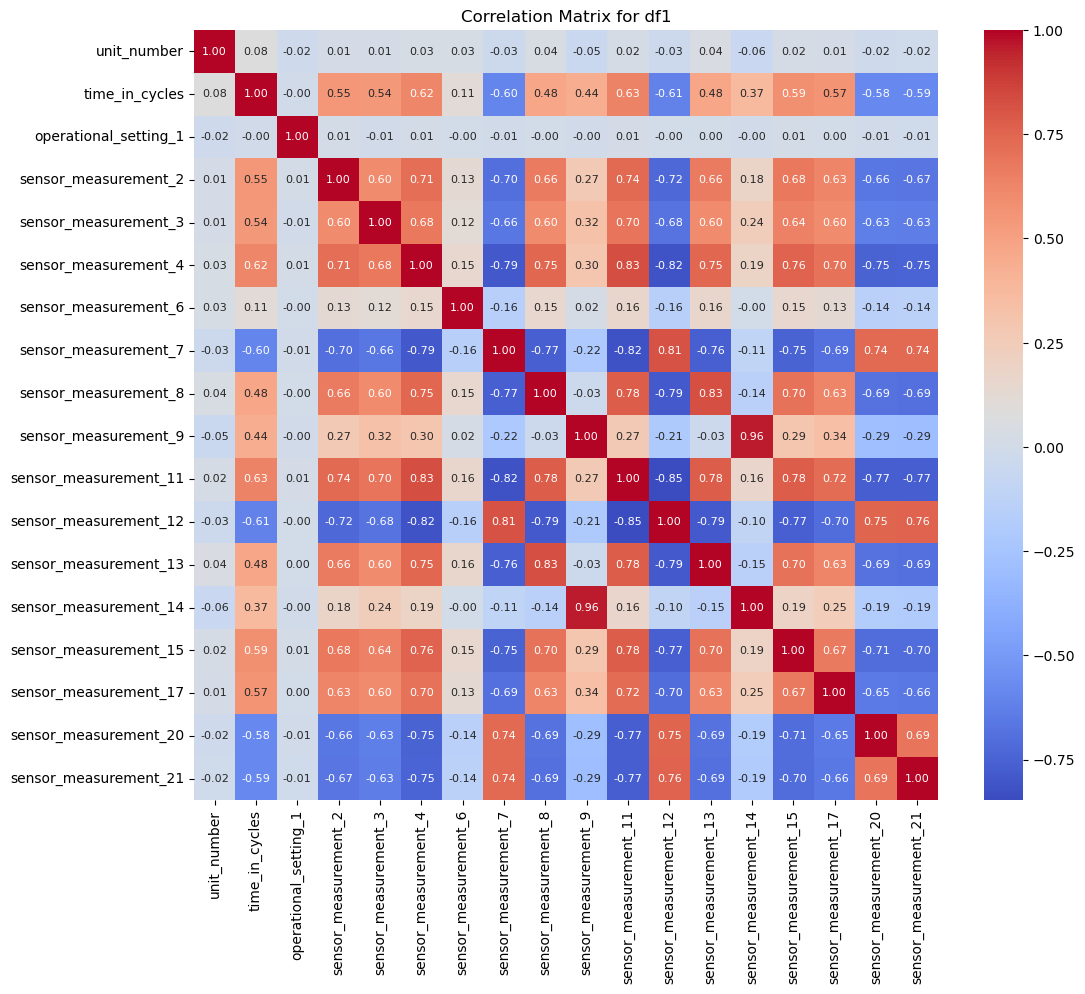

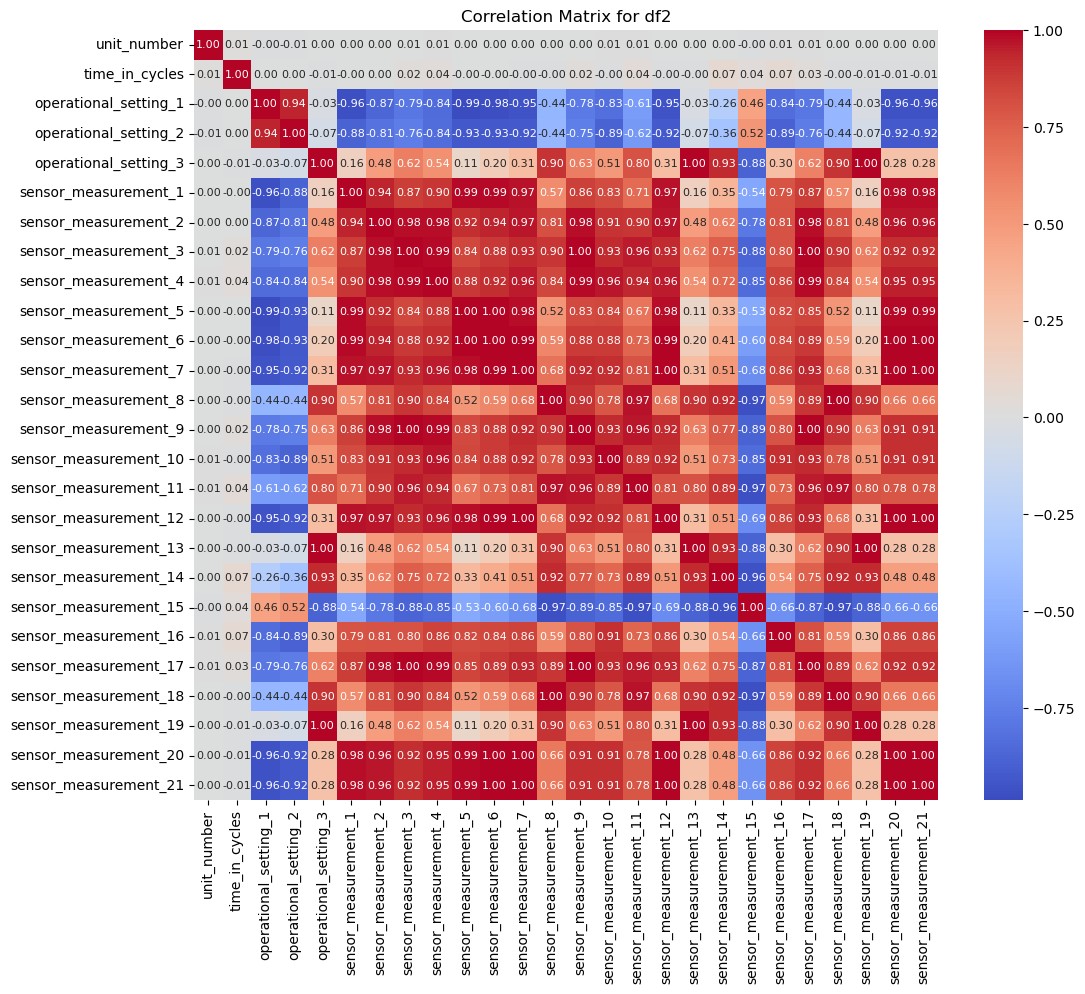

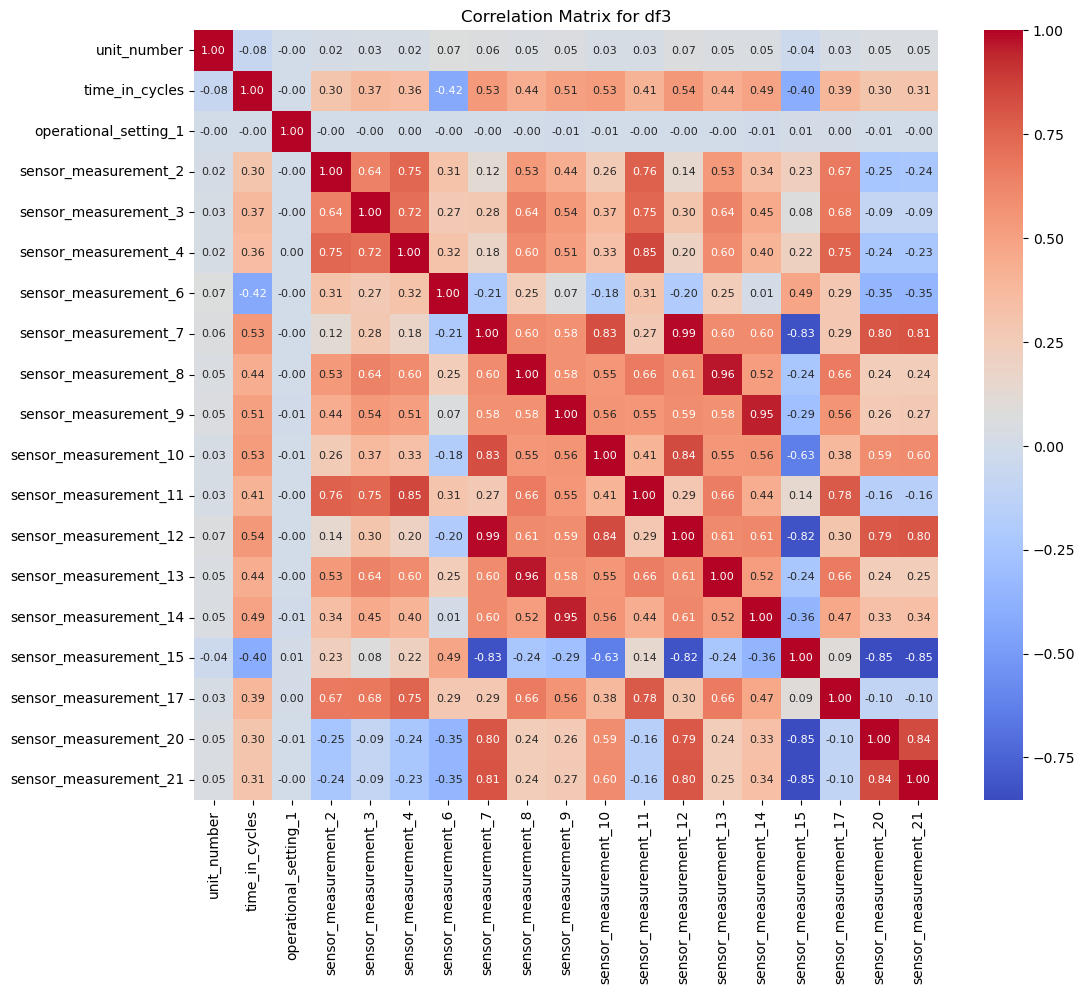

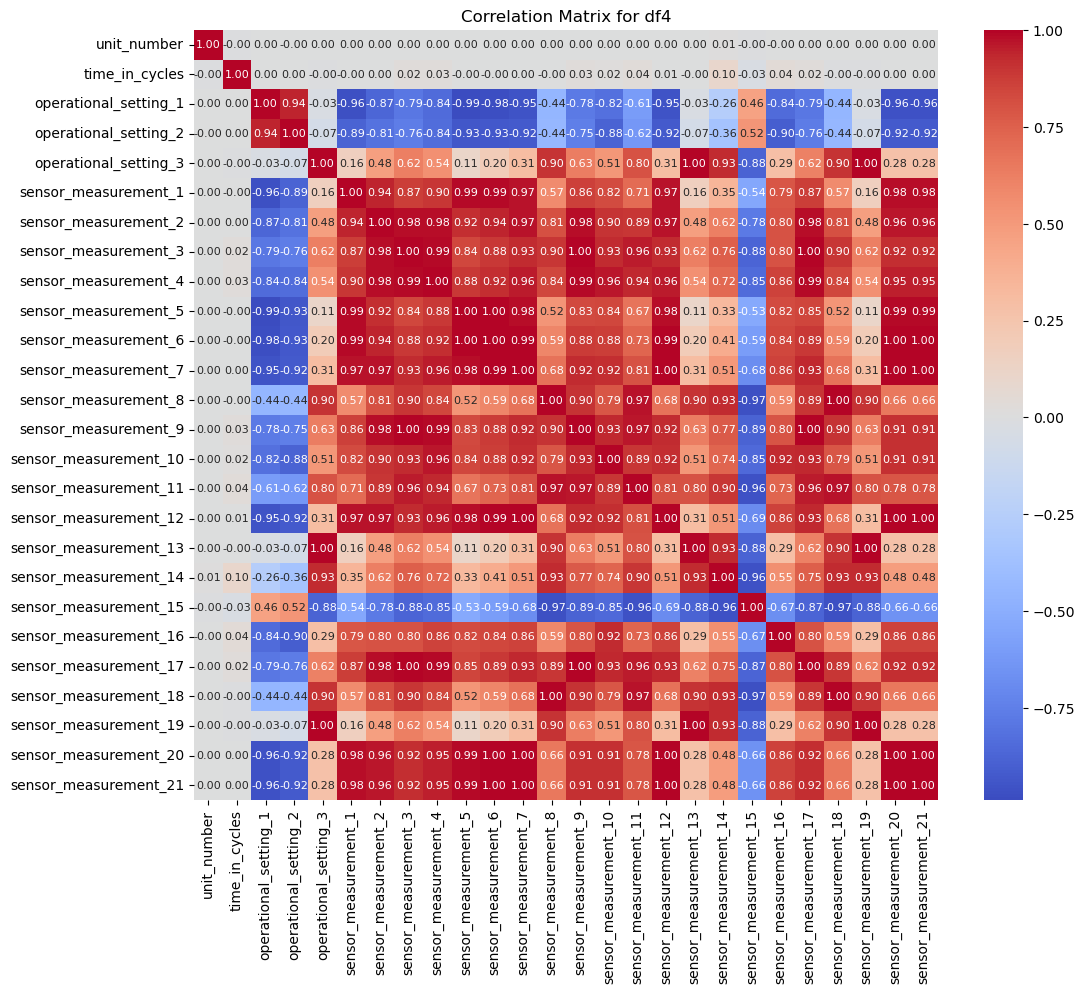

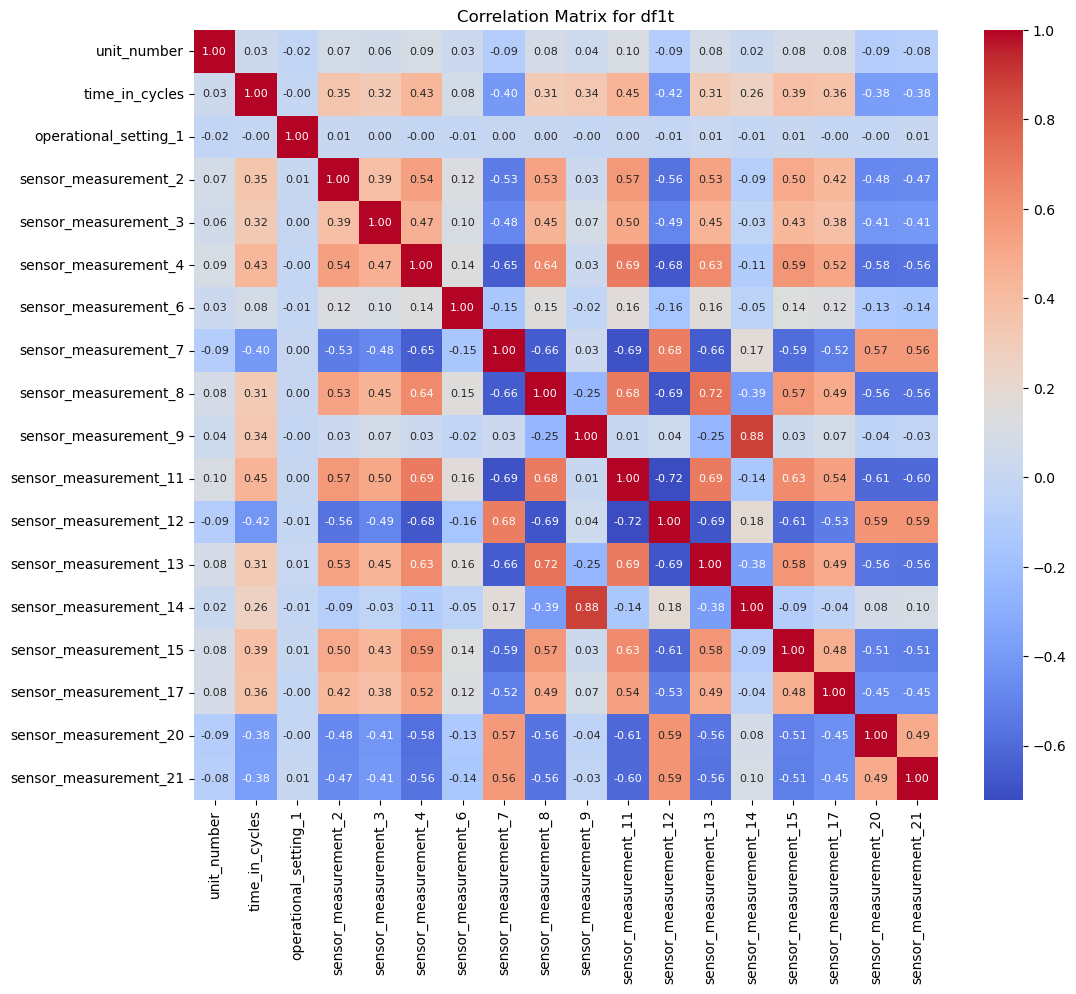

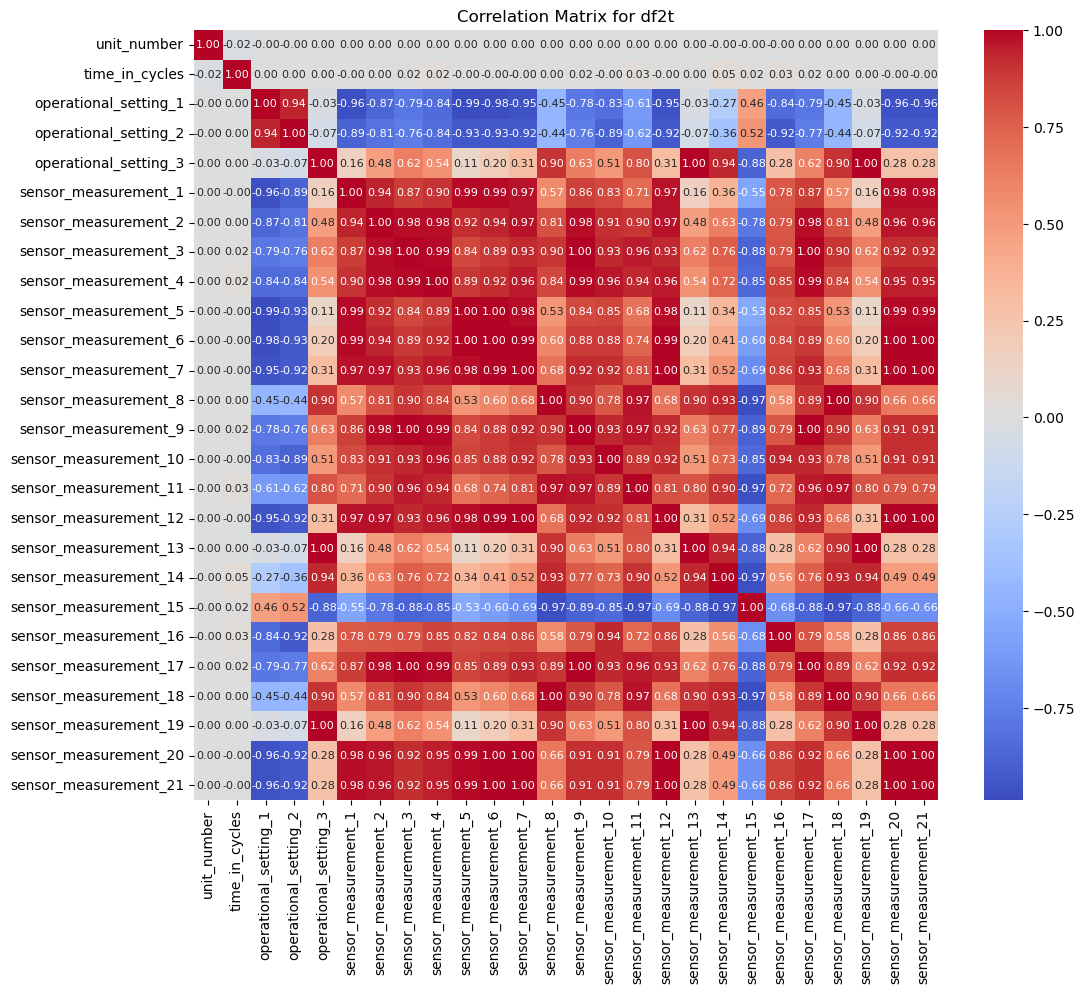

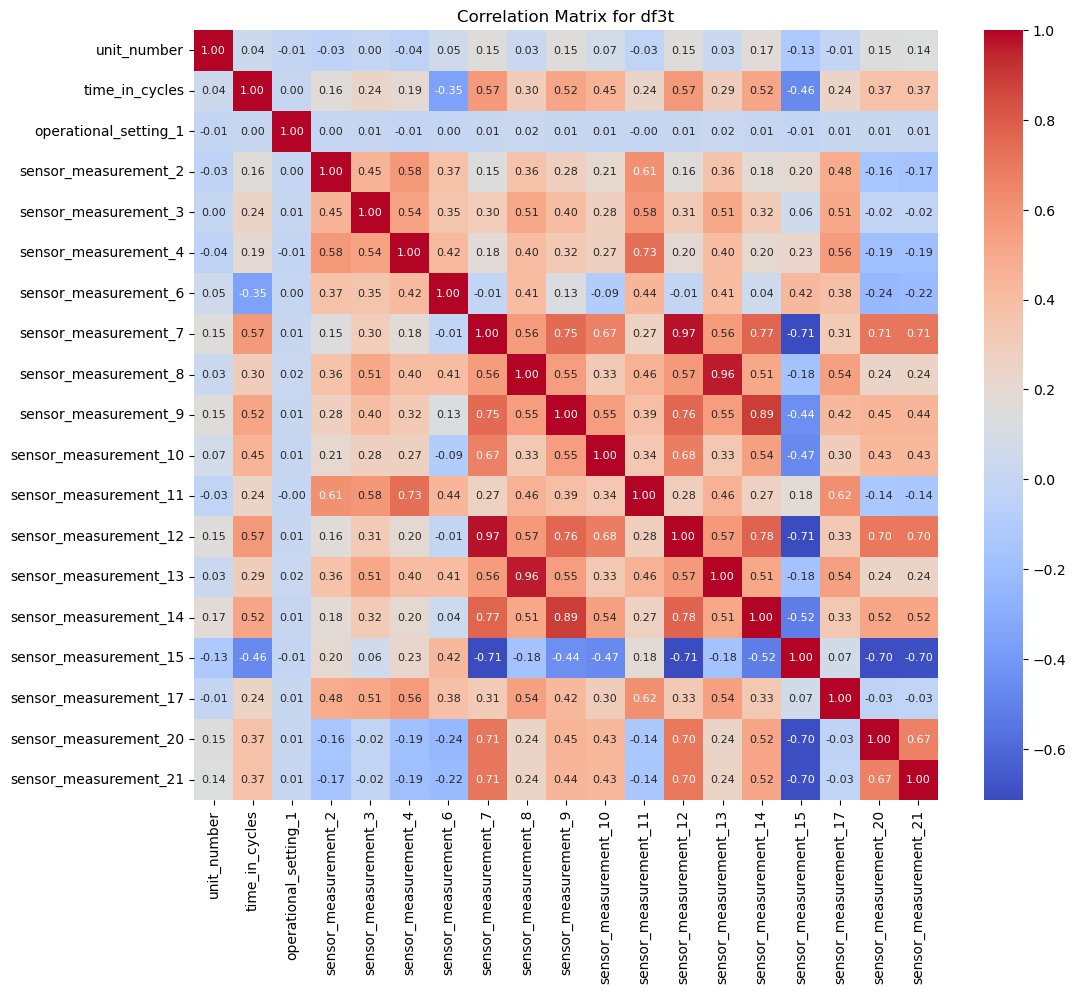

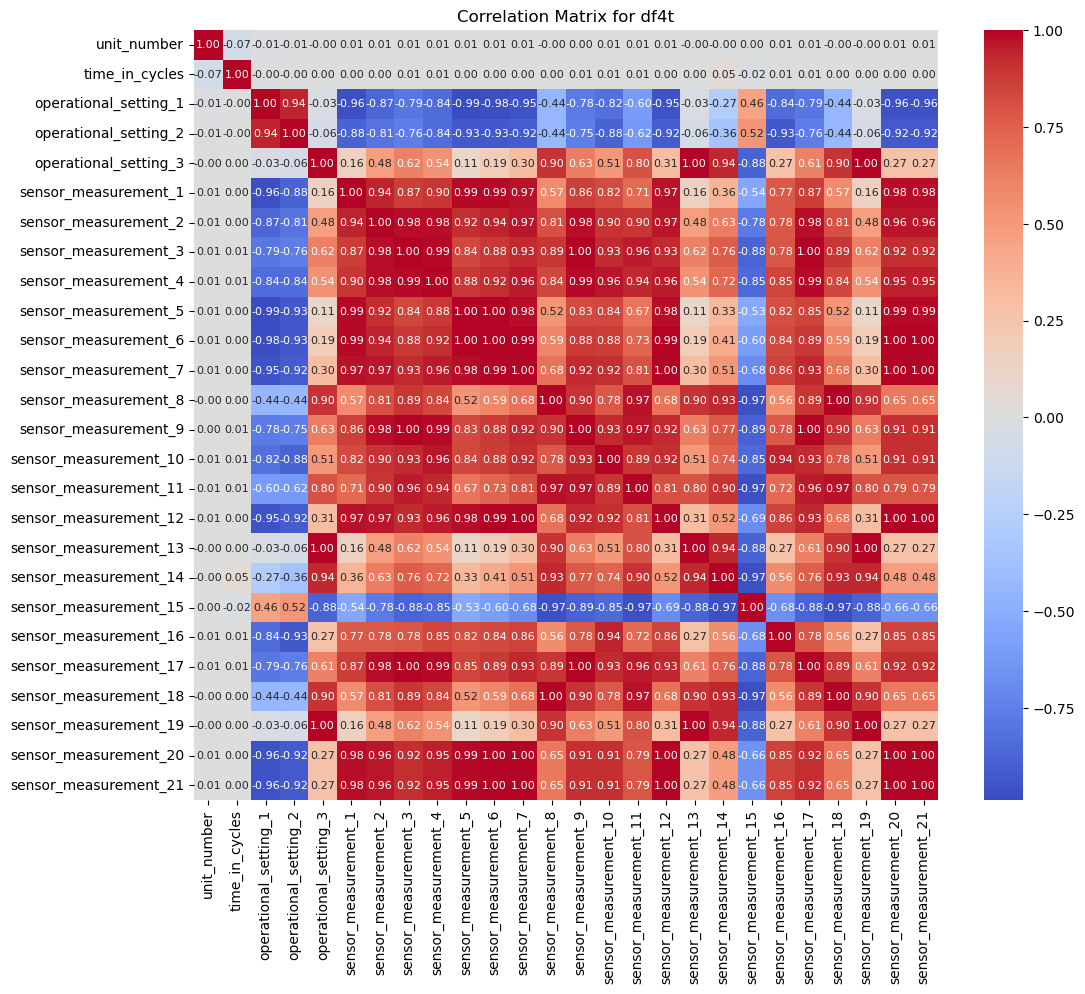

In [33]:
def plot_correlation_matrix(df, name):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {name}")
    plt.show()

# Define the DataFrame names
df_names = ["df1", "df2", "df3", "df4", "df1t", "df2t", "df3t", "df4t"]

# Loop over each DataFrame and compute correlation matrix
for name, df in zip(df_names, [df1, df2, df3, df4, df1t, df2t, df3t, df4t]):
    plot_correlation_matrix(df, name)

Overall, we have a very highly correlated data set specifically for df2 and df4. I believe that we will have multicolinearity problems if we do not have some sort of reduction or feature engineering of our variables. 

## Distribution Plots

<Figure size 1800x1600 with 0 Axes>

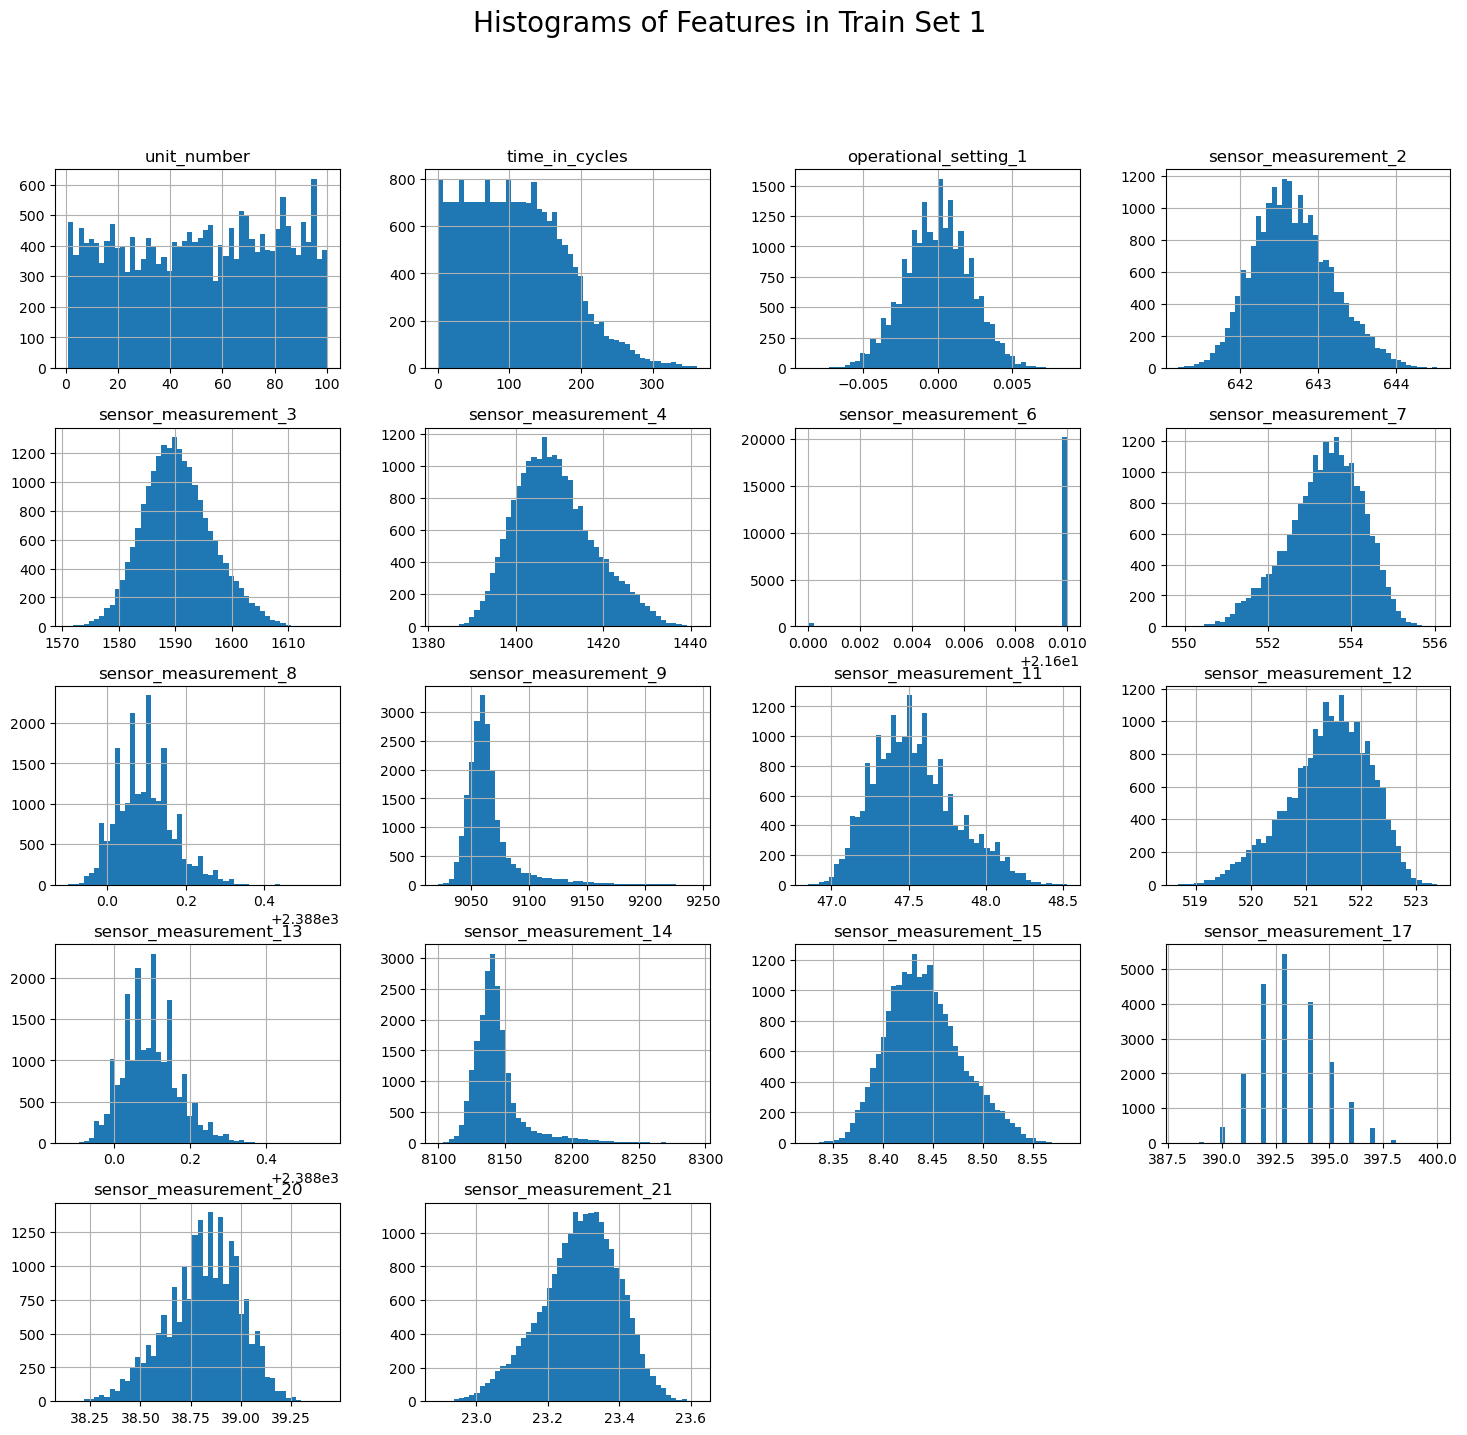

<Figure size 1800x1600 with 0 Axes>

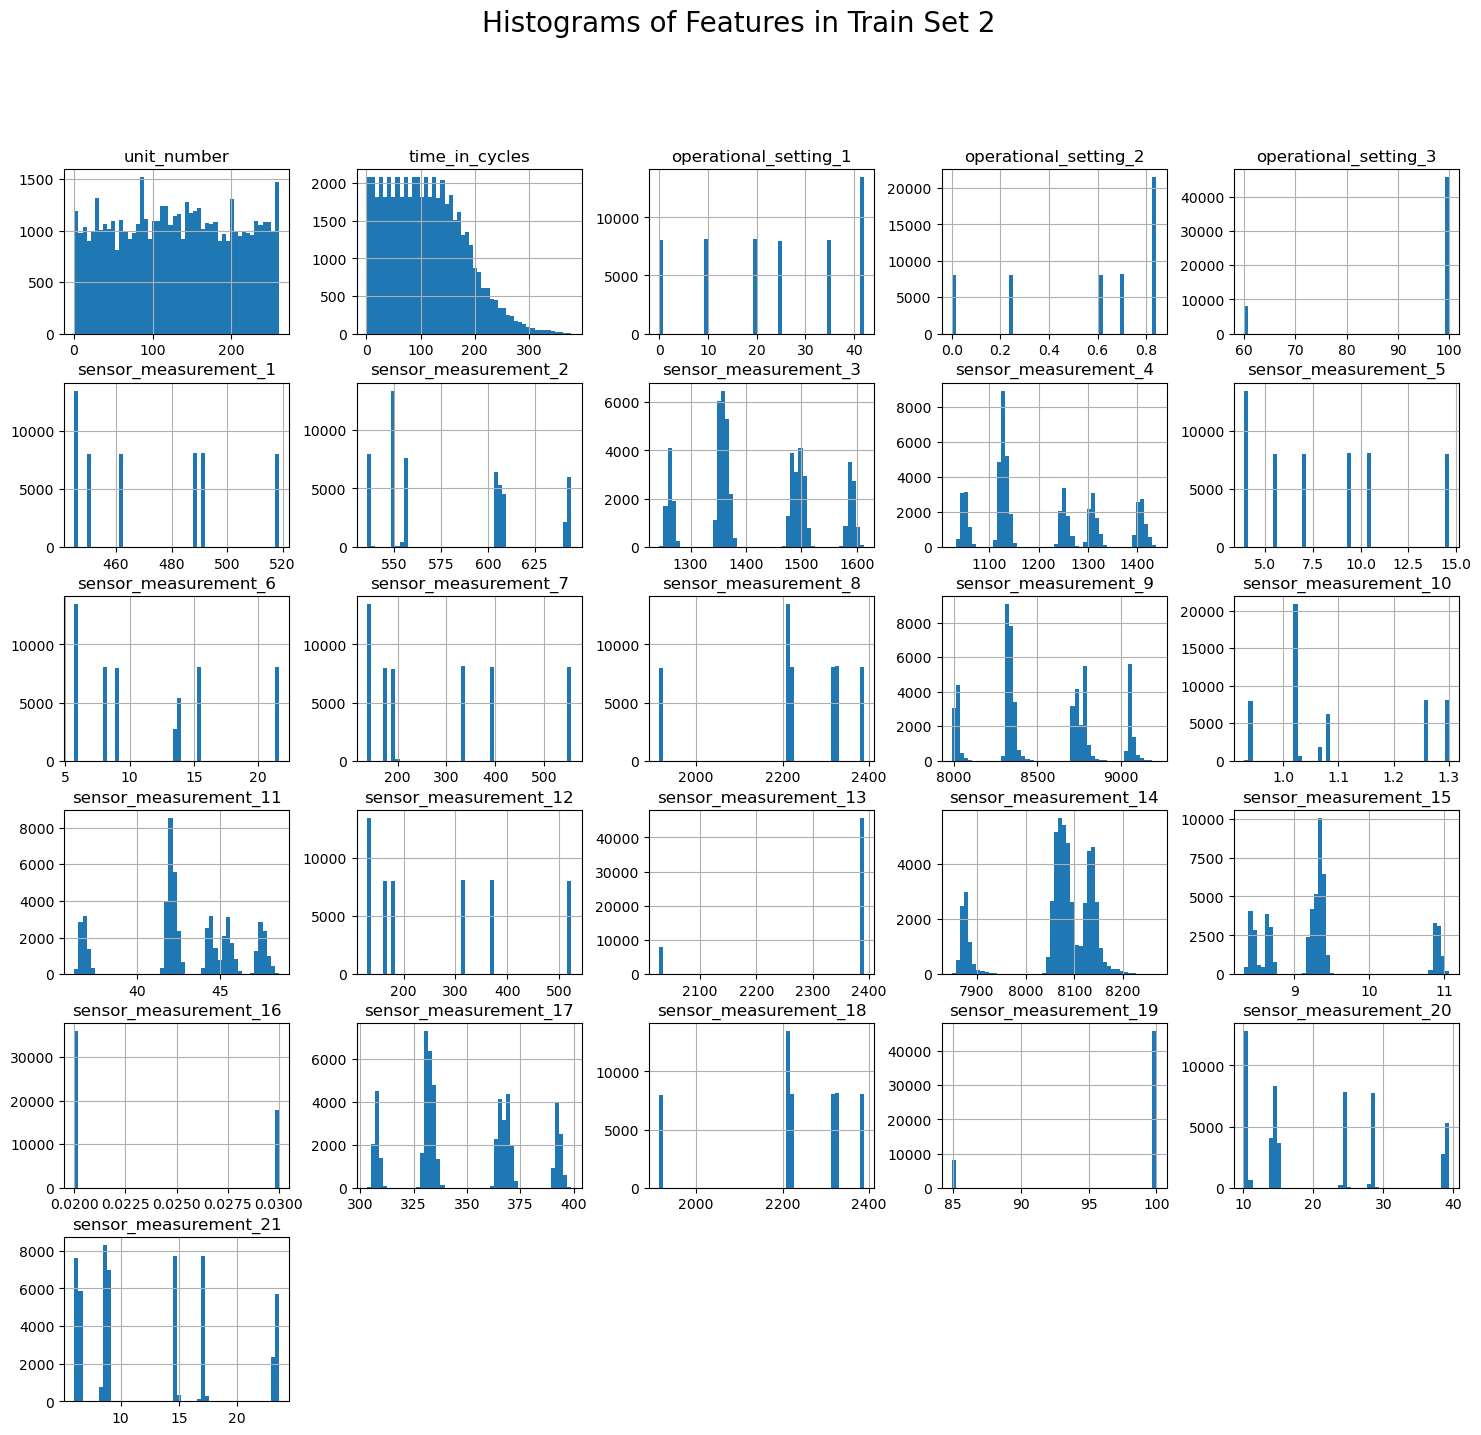

<Figure size 1800x1600 with 0 Axes>

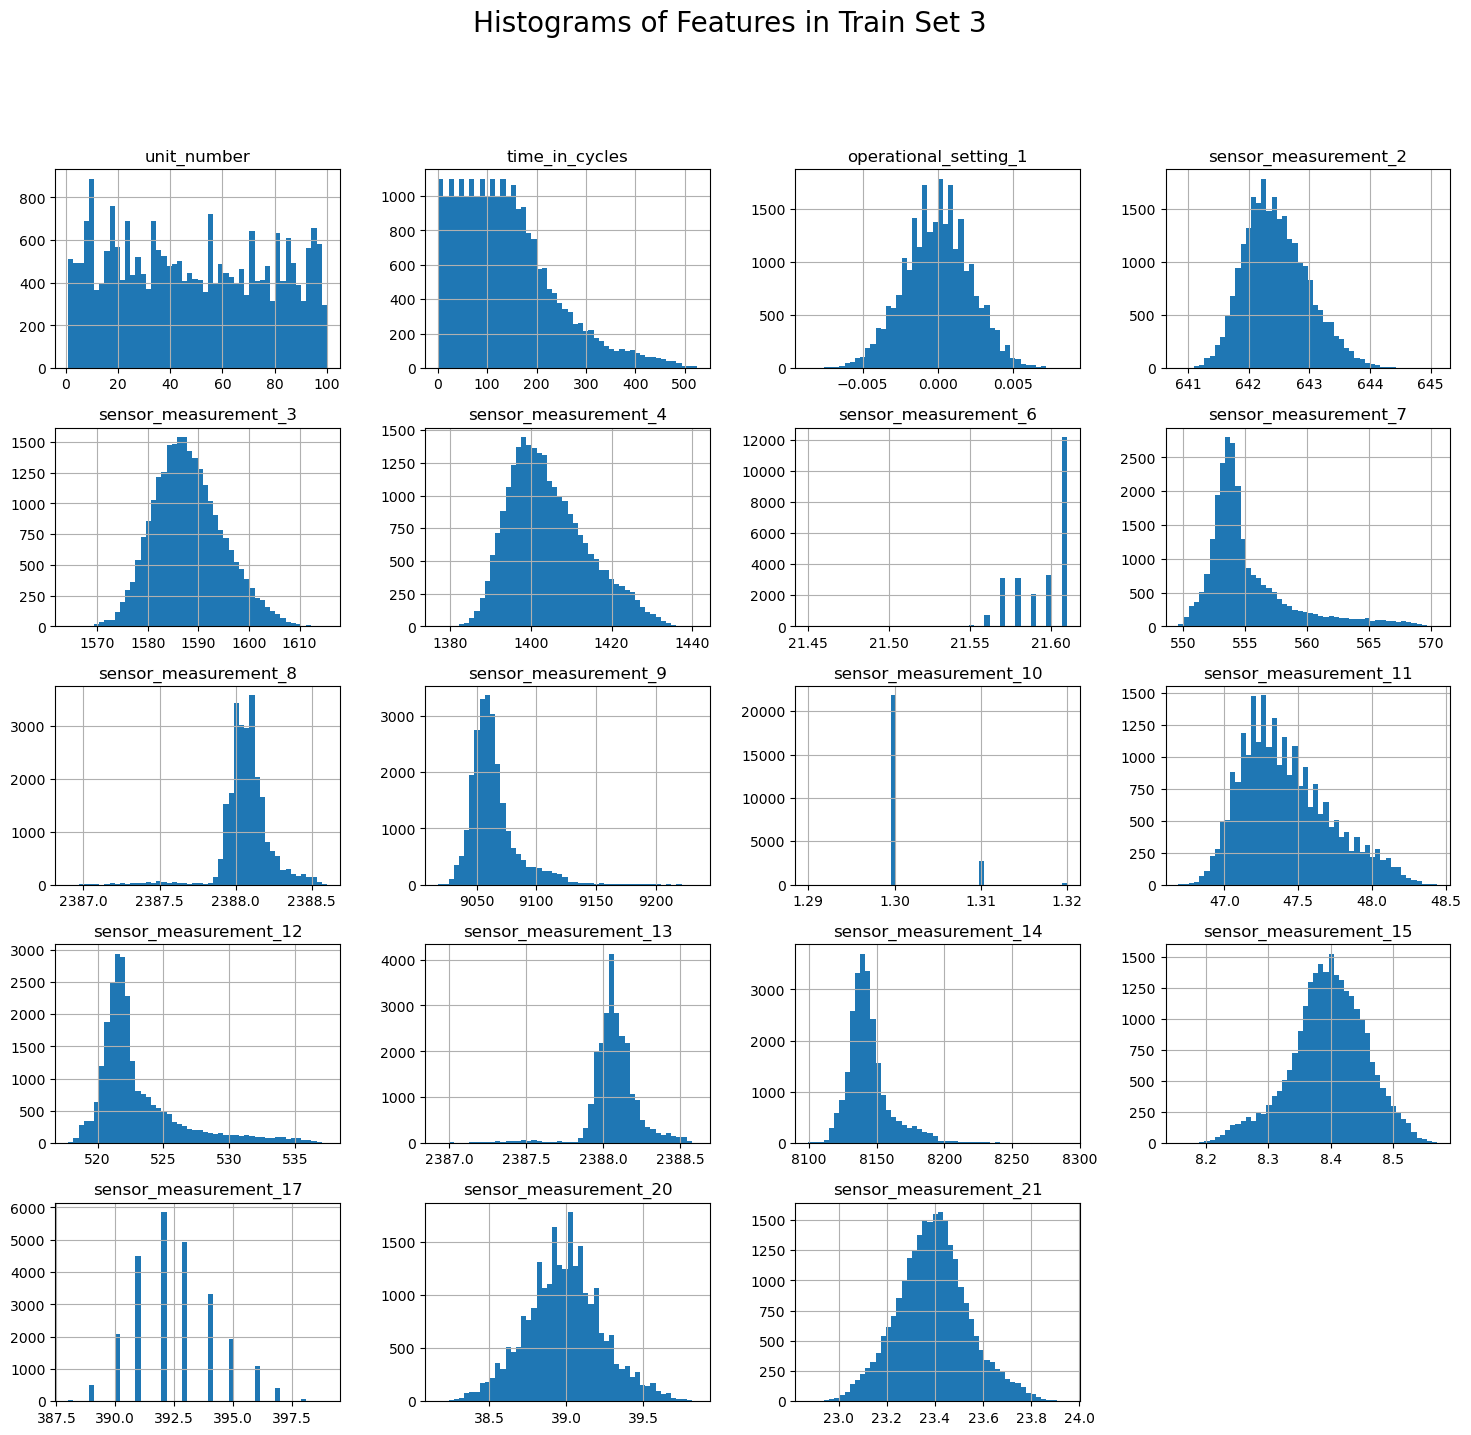

<Figure size 1800x1600 with 0 Axes>

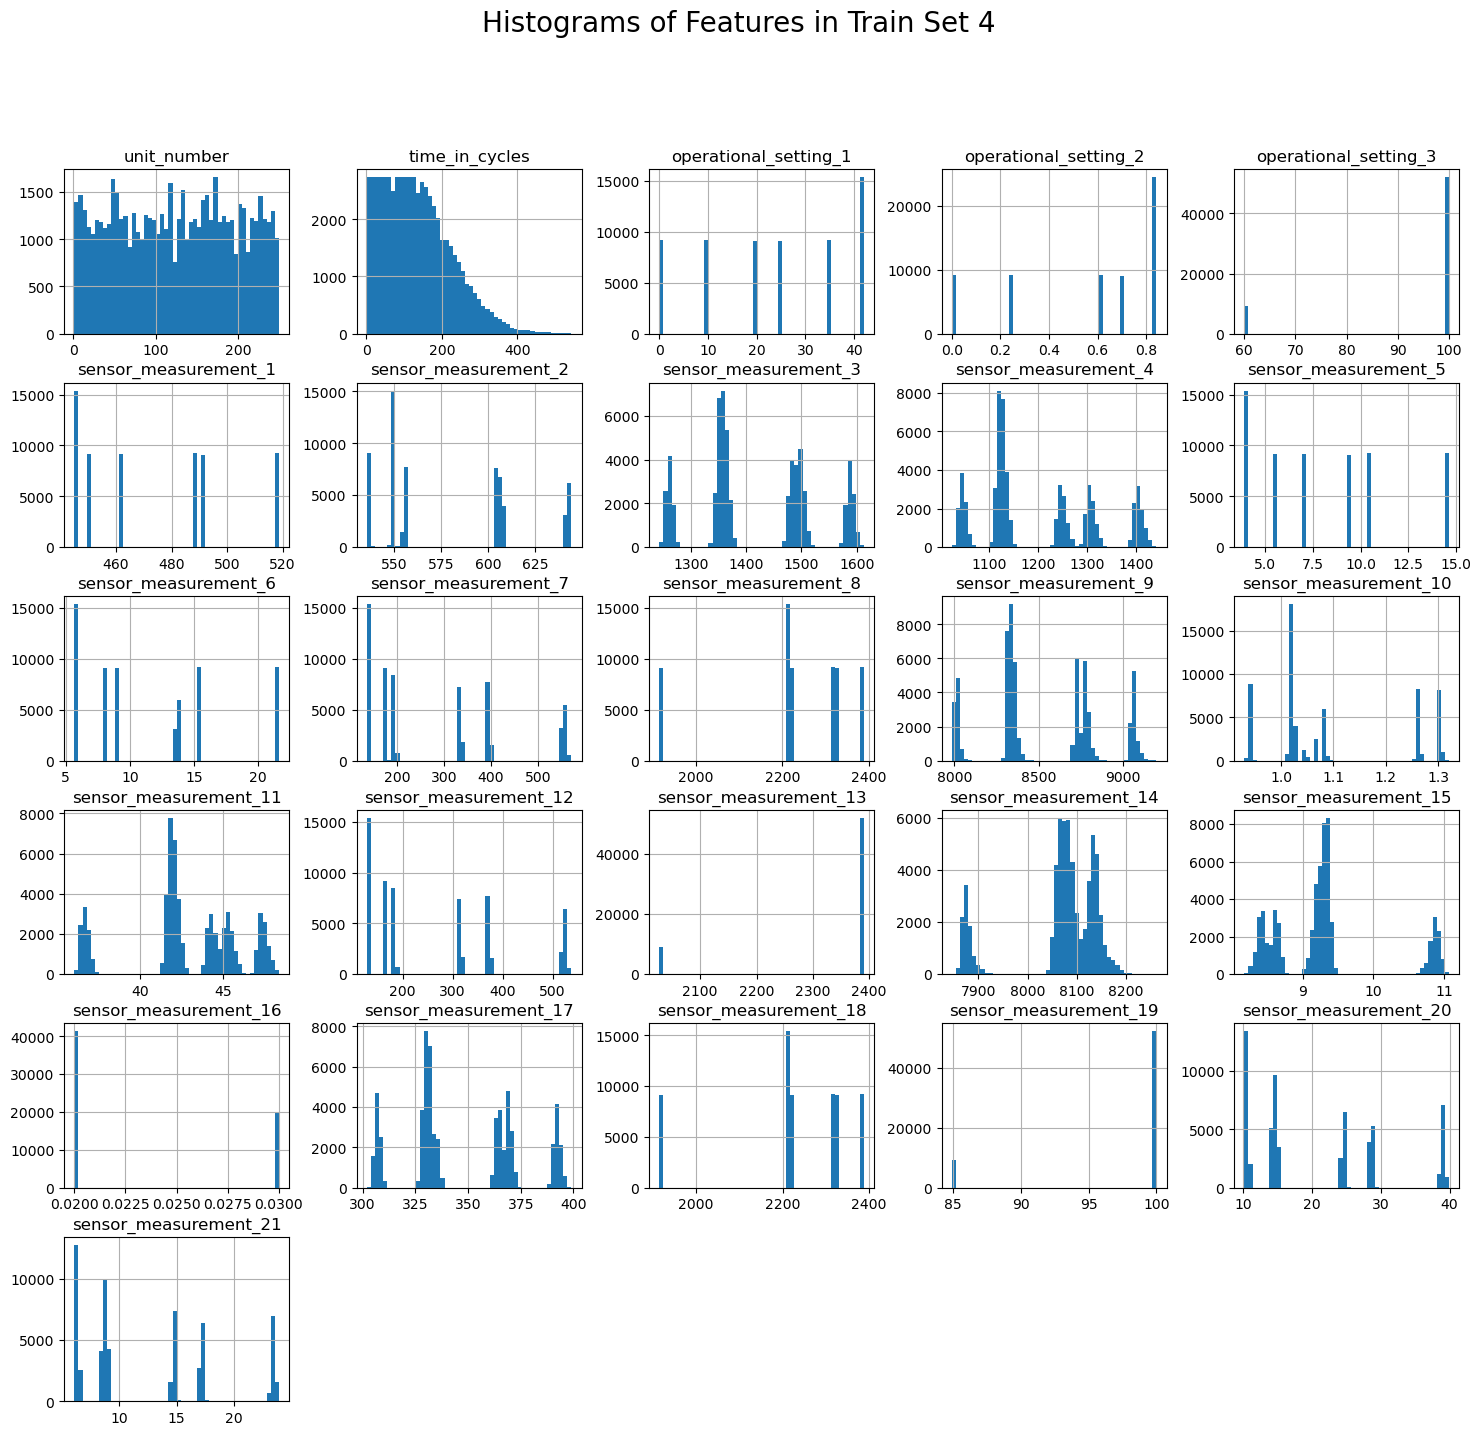

In [34]:
train_sets = [df1, df2, df3, df4]
train_labels = ['Train Set 1', 'Train Set 2', 'Train Set 3', 'Train Set 4']

# Plot histograms for each test set separately
for train_set, label in zip(train_sets, train_labels):
    plt.figure(figsize=(18, 16))
    train_set.hist(bins=50, figsize=(18, 16))
    plt.suptitle(f'Histograms of Features in {label}', fontsize=20)
    plt.show()

In [35]:
# Going to remove sensor 6 from df1 and dft1 since it doesn's seem to provide any statistical sig
df1.drop('sensor_measurement_6', axis=1, inplace=True)
df1t.drop('sensor_measurement_6', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   sensor_measurement_2   20631 non-null  float64
 4   sensor_measurement_3   20631 non-null  float64
 5   sensor_measurement_4   20631 non-null  float64
 6   sensor_measurement_7   20631 non-null  float64
 7   sensor_measurement_8   20631 non-null  float64
 8   sensor_measurement_9   20631 non-null  float64
 9   sensor_measurement_11  20631 non-null  float64
 10  sensor_measurement_12  20631 non-null  float64
 11  sensor_measurement_13  20631 non-null  float64
 12  sensor_measurement_14  20631 non-null  float64
 13  sensor_measurement_15  20631 non-null  float64
 14  sensor_measurement_17  20631 non-null  int64  
 15  se

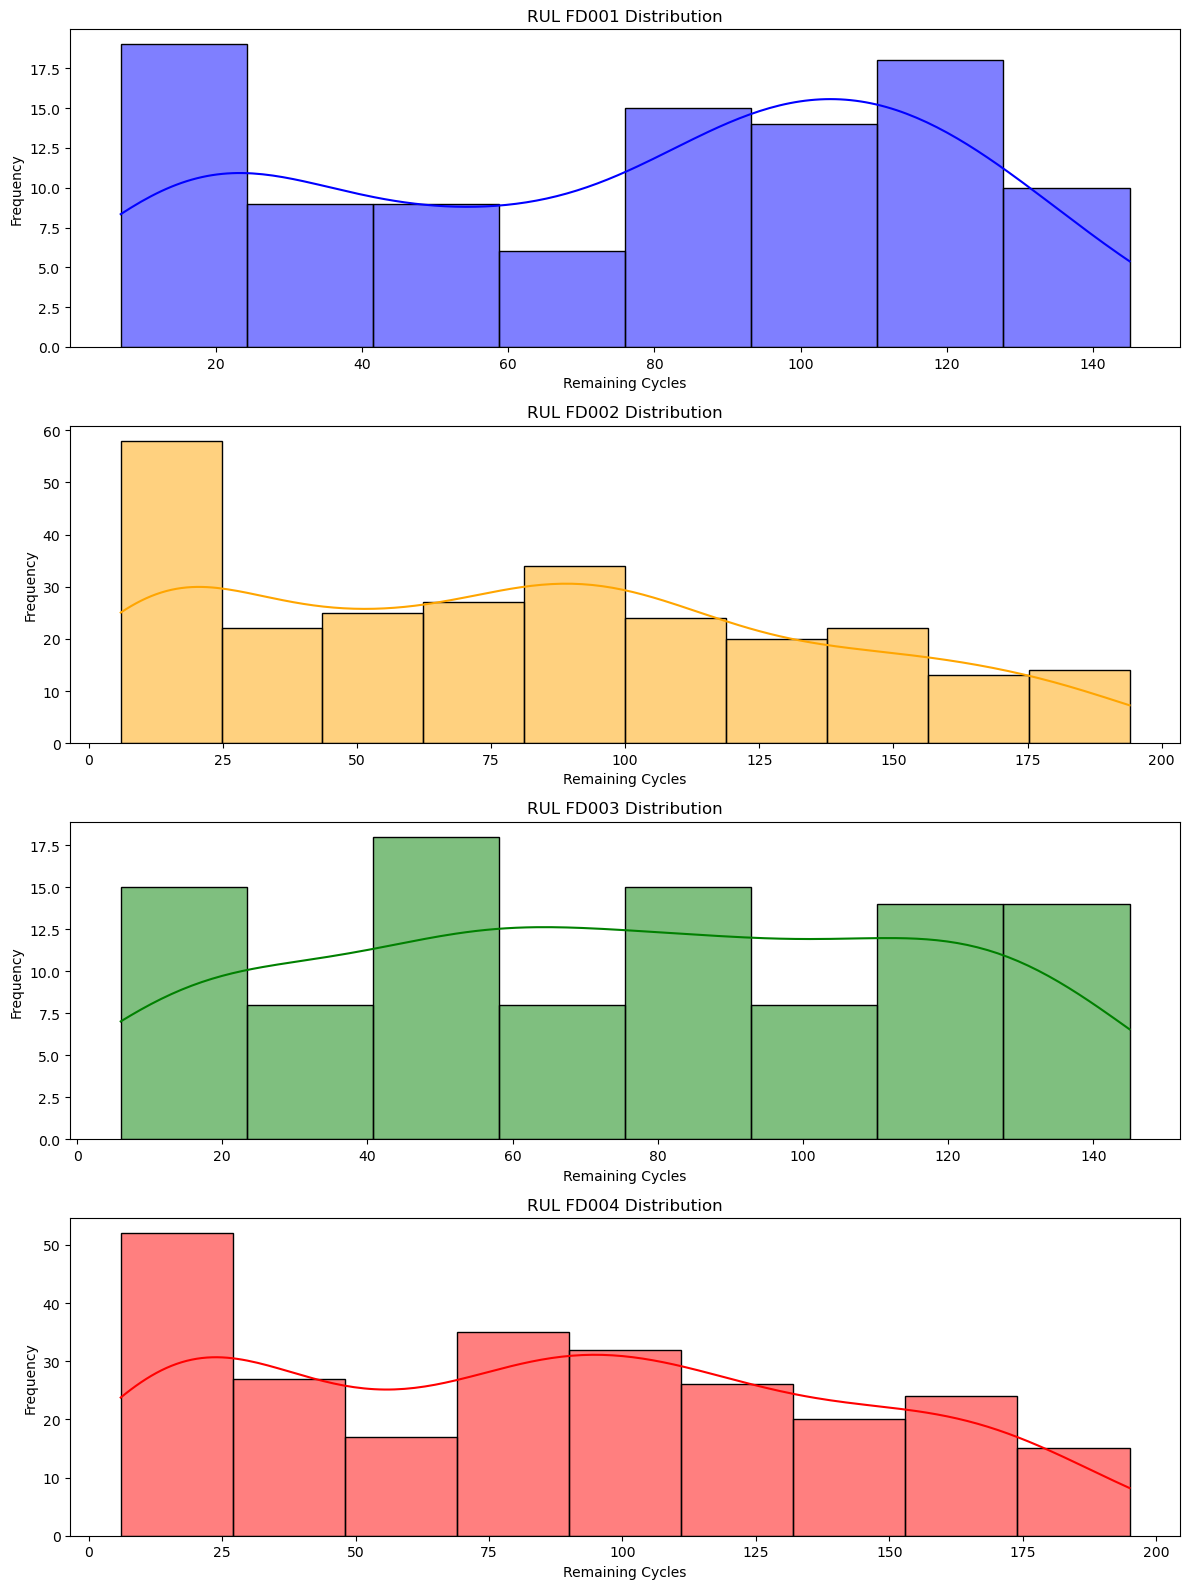

In [36]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
sns.histplot(dfr1['remaining_cycles'], kde=True, color='blue')
plt.title('RUL FD001 Distribution')
plt.xlabel('Remaining Cycles')
plt.ylabel('Frequency')

plt.subplot(4, 1, 2)
sns.histplot(dfr2['remaining_cycles'], kde=True, color='orange')
plt.title('RUL FD002 Distribution')
plt.xlabel('Remaining Cycles')
plt.ylabel('Frequency')

plt.subplot(4, 1, 3)
sns.histplot(dfr3['remaining_cycles'], kde=True, color='green')
plt.title('RUL FD003 Distribution')
plt.xlabel('Remaining Cycles')
plt.ylabel('Frequency')

plt.subplot(4, 1, 4)
sns.histplot(dfr4['remaining_cycles'], kde=True, color='red')
plt.title('RUL FD004 Distribution')
plt.xlabel('Remaining Cycles')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1800x1600 with 0 Axes>

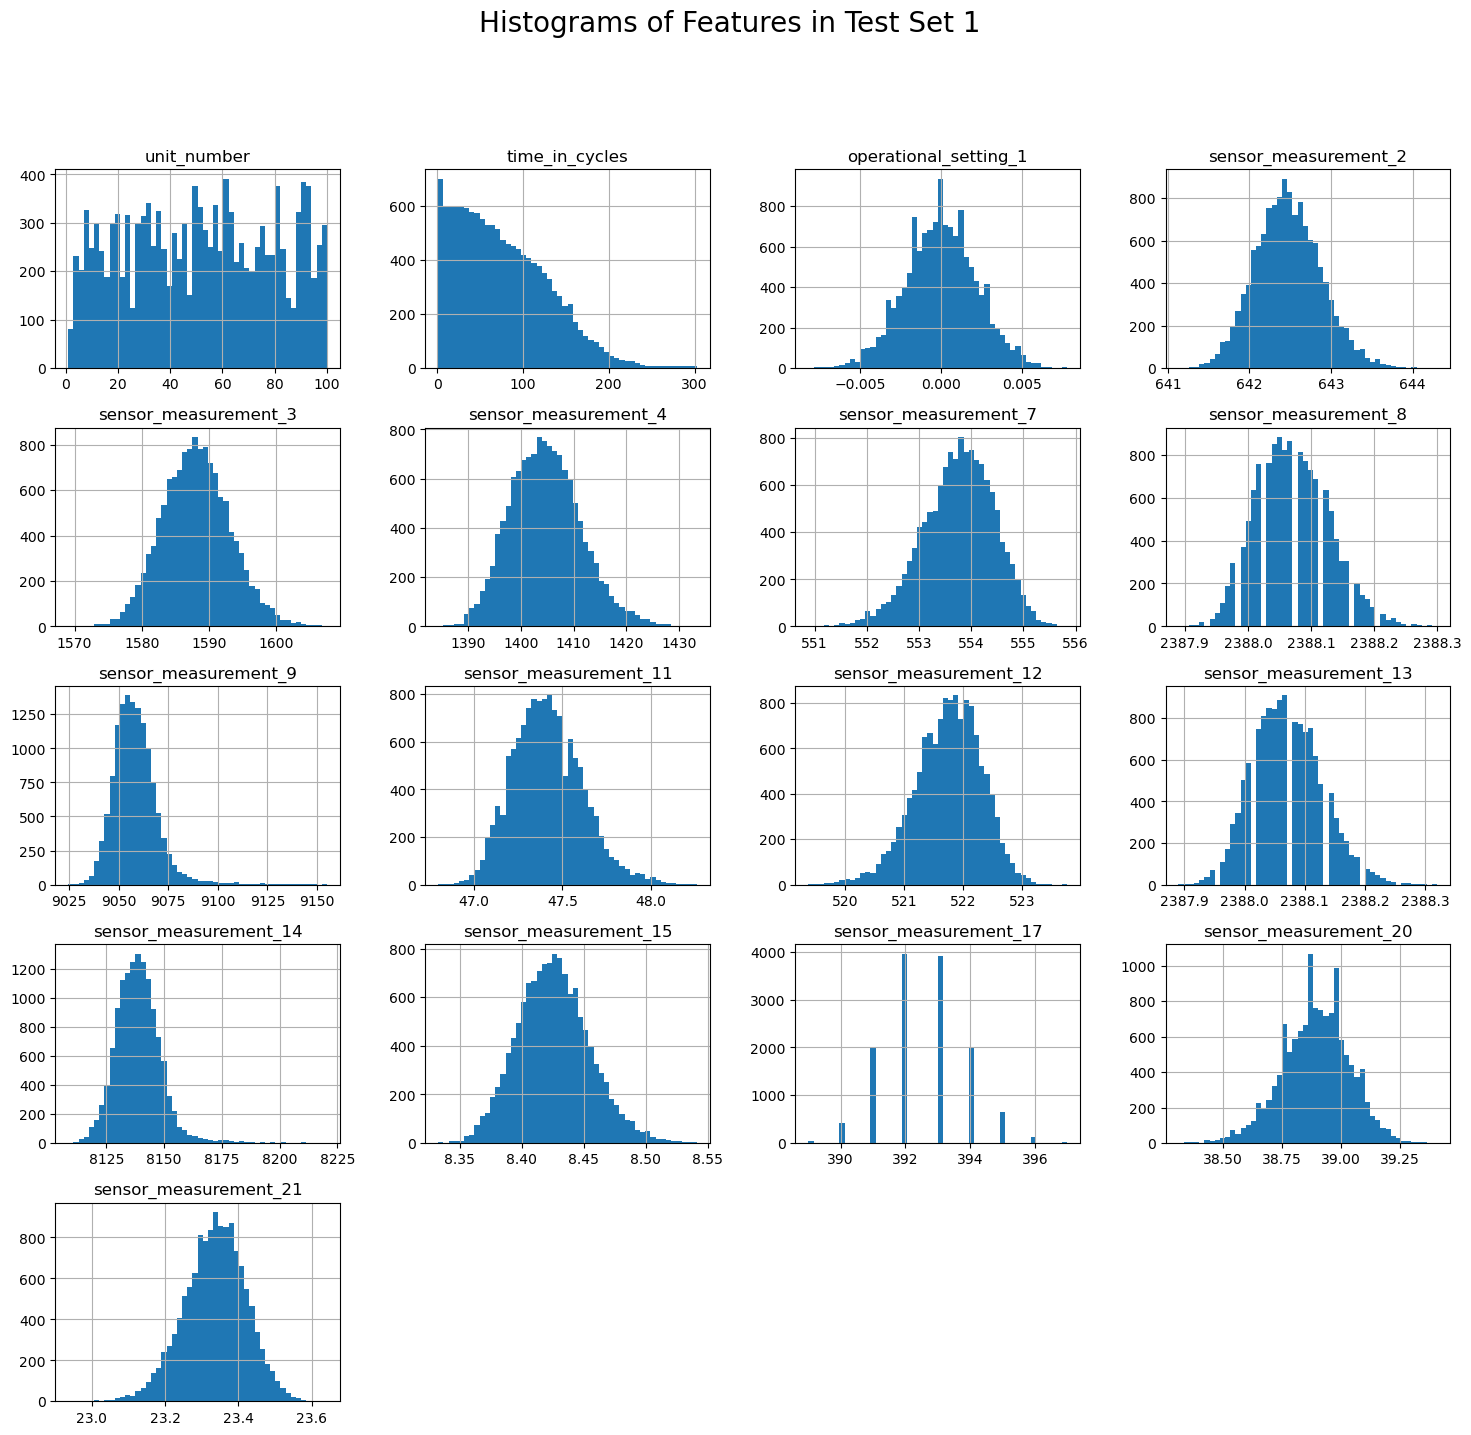

<Figure size 1800x1600 with 0 Axes>

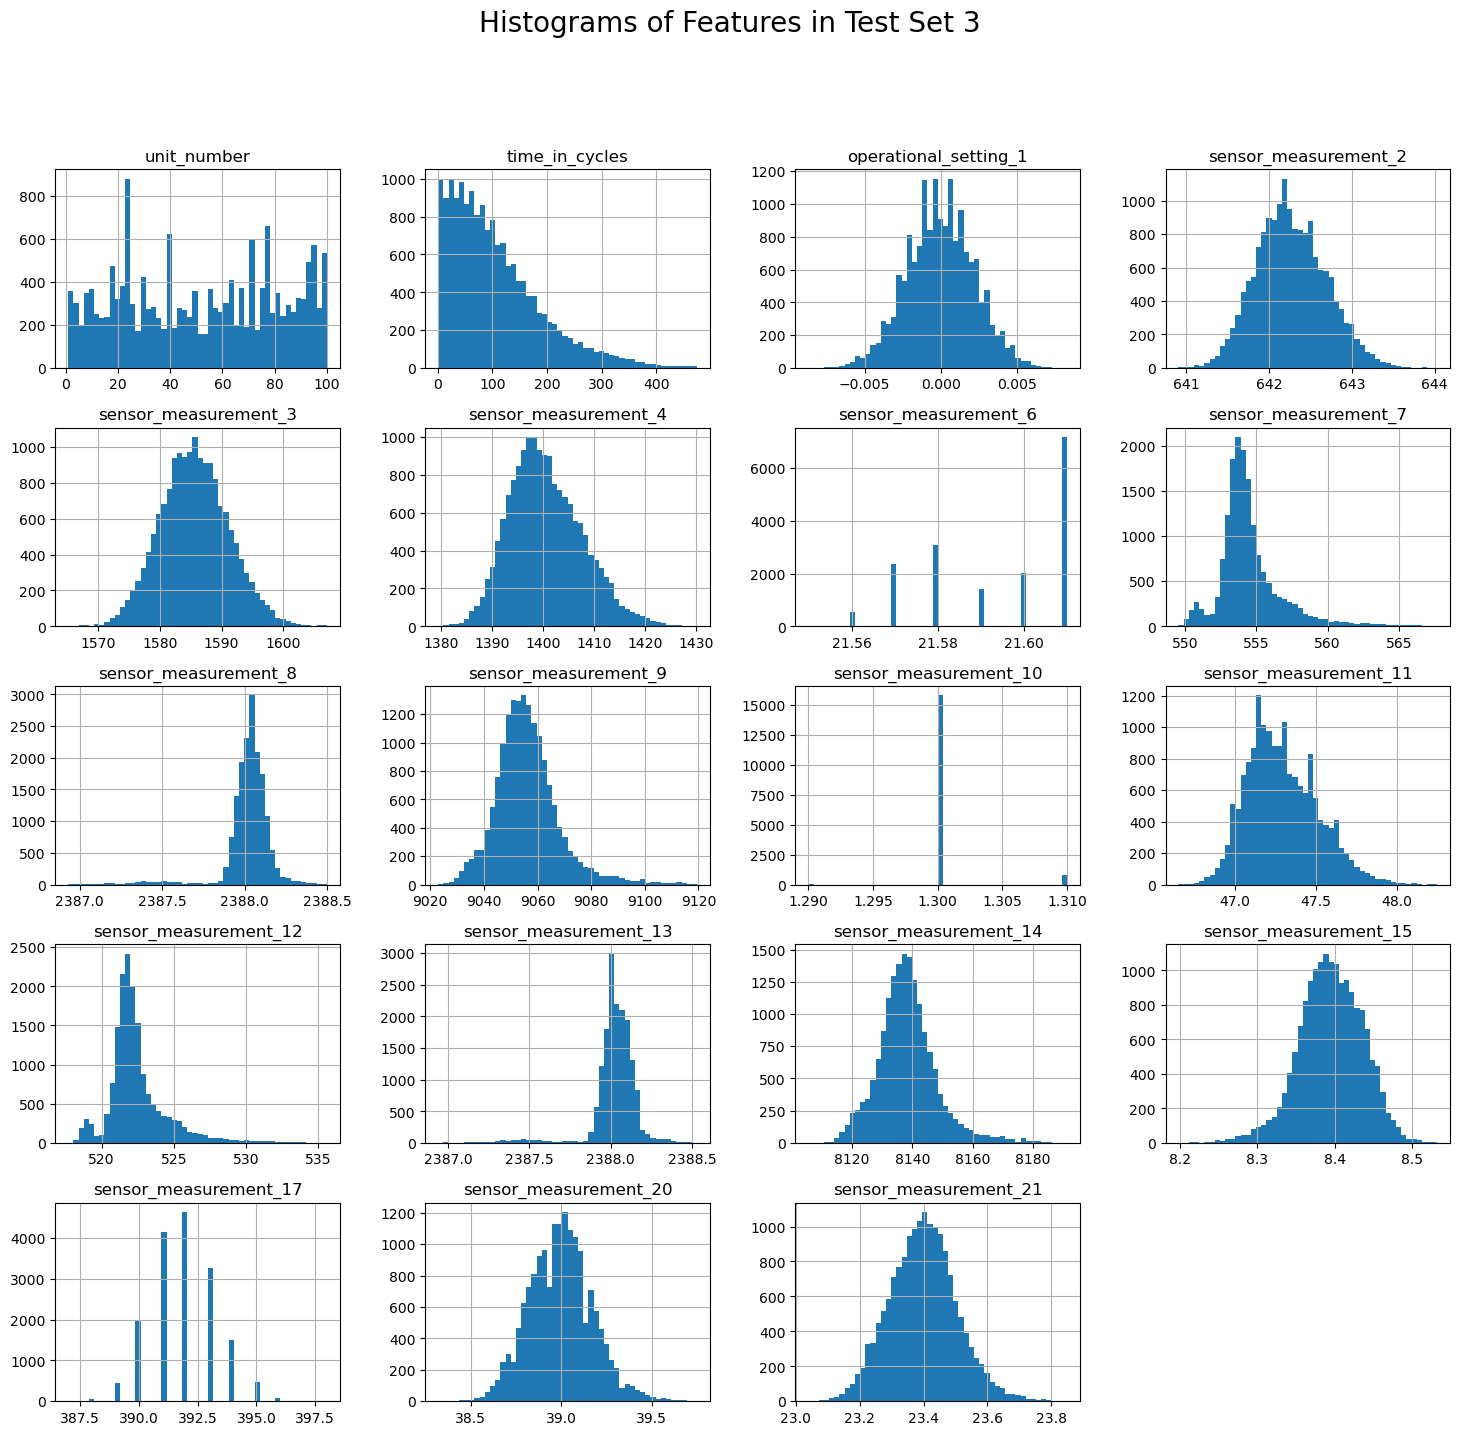

<Figure size 1800x1600 with 0 Axes>

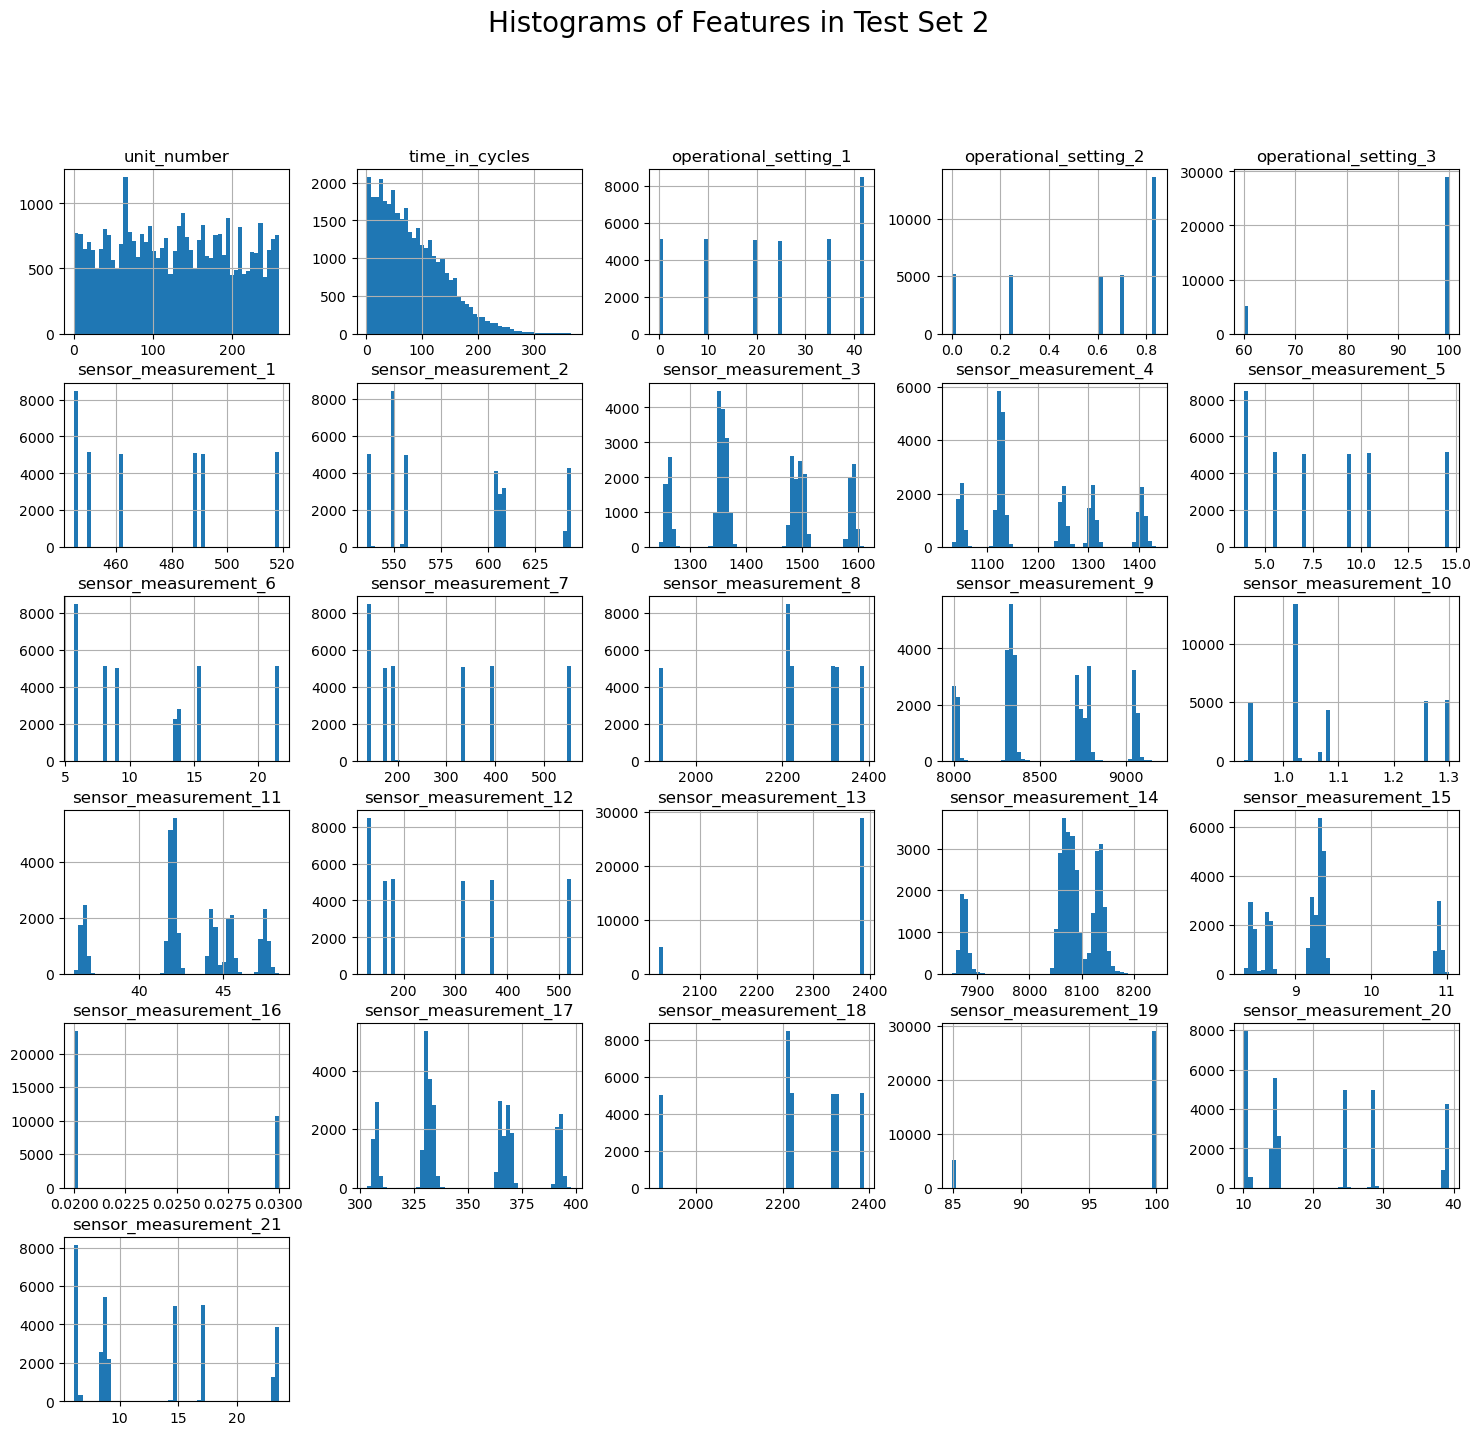

<Figure size 1800x1600 with 0 Axes>

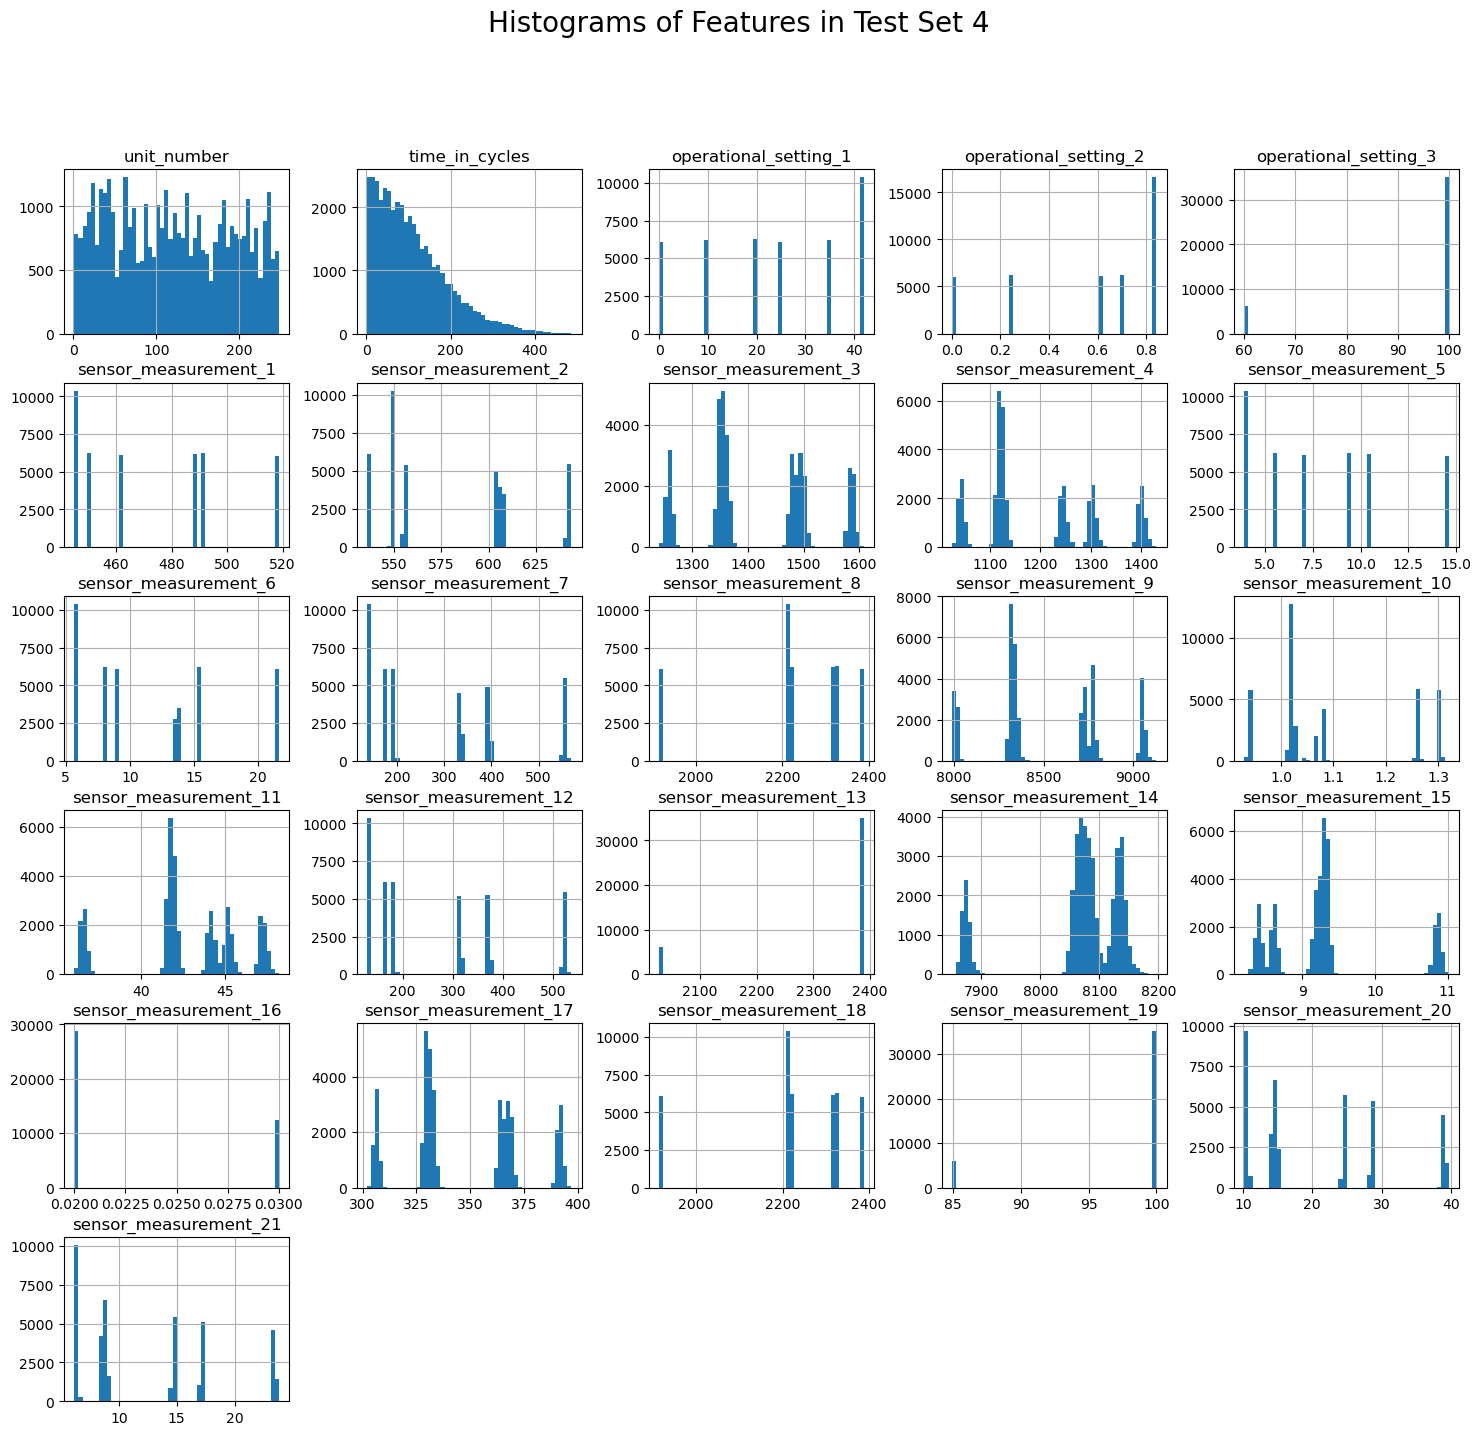

In [37]:
# I don't need to do this for the test data set, because whatever we do to the training needs to happen to the test set
# Just want to see them.
test_sets = [df1t, df3t, df2t, df4t]
test_labels = ['Test Set 1', 'Test Set 3', 'Test Set 2', 'Test Set 4']

# Plot histograms for each test set separately
for test_set, label in zip(test_sets, test_labels):
    plt.figure(figsize=(18, 16))
    test_set.hist(bins=50, figsize=(18, 16))
    plt.suptitle(f'Histograms of Features in {label}', fontsize=20)
    plt.show()

### One and three look noramally distributed for most of the sensors. Two and four on the other hand do not. 

## Adding the RUL column to both training and testing.

In [38]:

# Calculate the maximum cycle value for each unit
max_cycles_df1 = df1.groupby('unit_number')['time_in_cycles'].max()
max_cycles_df2 = df2.groupby('unit_number')['time_in_cycles'].max()
max_cycles_df3 = df3.groupby('unit_number')['time_in_cycles'].max()
max_cycles_df4 = df4.groupby('unit_number')['time_in_cycles'].max()

# Map the maximum cycle value to each row based on the 'unit_number'
df1['max_cycle'] = df1['unit_number'].map(max_cycles_df1)
df2['max_cycle'] = df2['unit_number'].map(max_cycles_df2)
df3['max_cycle'] = df3['unit_number'].map(max_cycles_df3)
df4['max_cycle'] = df4['unit_number'].map(max_cycles_df4)

# Calculate RUL for each row by subtracting the current cycle value from the maximum cycle value
df1['RUL'] = df1['max_cycle'] - df1['time_in_cycles']
df2['RUL'] = df2['max_cycle'] - df2['time_in_cycles']
df3['RUL'] = df3['max_cycle'] - df3['time_in_cycles']
df4['RUL'] = df4['max_cycle'] - df4['time_in_cycles']

# Drop the 'max_cycle' column (not needed anymore)
df1.drop('max_cycle', axis=1, inplace=True)
df2.drop('max_cycle', axis=1, inplace=True)
df3.drop('max_cycle', axis=1, inplace=True)
df4.drop('max_cycle', axis=1, inplace=True)

# Display the DataFrames with RUL column added
df1.head()

unit_number  time_in_cycles  operational_setting_1  sensor_measurement_2  \
0            1               1                 -0.001               641.820   
1            1               2                  0.002               642.150   
2            1               3                 -0.004               642.350   
3            1               4                  0.001               642.350   
4            1               5                 -0.002               642.370   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0              1589.700              1400.600               554.360   
1              1591.820              1403.140               553.750   
2              1587.990              1404.200               554.260   
3              1582.790              1401.870               554.450   
4              1582.850              1406.220               554.000   

   sensor_measurement_8  sensor_measurement_9  sensor_measurement_11  \
0              2388.060              9046.190                 47.470   
1              2388.040              9044.070                 47.490   
2              2388.080              9052.940                 47.270   
3              2388.110              9049.480                 47.130   
4              2388.060              9055.150                 47.280   

   sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                521.660               2388.020               8138.620   
1                522.280               2388.070               8131.490   
2                522.420               2388.030               8133.230   
3                522.860               2388.080               8133.830   
4                522.190               2388.040               8133.800   

   sensor_measurement_15  sensor_measurement_17  sensor_measurement_20  \
0                  8.419                    392                 39.060   
1                  8.432                    392                 39.000   
2                  8.418                    390                 38.950   
3                  8.368                    392                 38.880   
4                  8.429                    393                 38.900   

   sensor_measurement_21  RUL  
0                 23.419  191  
1                 23.424  190  
2                 23.344  189  
3                 23.374  188  
4                 23.404  187

## Training Dataset is good now as far as RUL. Now we need to do the test set.

In [39]:
# The code below attaches the RUL Vector data to the corresponding test dataframe.
# Remeber that the test data RUL ends outside of the data, so really this number will just correspond to the last row.
dataframes = [df1t, df2t, df3t, df4t]  # Add more DataFrames as needed
rul_vectors = [dfr1, dfr2, dfr3, dfr4]  # Add more RUL vectors as needed

# Iterate over each DataFrame and its corresponding RUL vector
for df, rul_vector in zip(dataframes, rul_vectors):
    # Create a dictionary to map unit numbers to RUL values
    unit_rul_map = {}
    unit_numbers = df['unit_number'].unique()
    for i, unit_number in enumerate(unit_numbers):
        if i < len(rul_vector):
            unit_rul_map[unit_number] = rul_vector.iloc[i][0]  # Assuming RUL values are in the first column of the RUL vector
    
    # Map RUL values to a new column in the DataFrame
    df['RUL'] = df['unit_number'].map(unit_rul_map)

In [40]:
# The then adds the row count to the rul vector data and then subtracts 1 for each cycle.
max_cycles_per_unit = df1t.groupby('unit_number')['time_in_cycles'].max()

# Update RUL for each unit
for unit, max_cycles in max_cycles_per_unit.items():
    df1t.loc[df1t['unit_number'] == unit, 'RUL'] = max_cycles + df1t.loc[df1t['unit_number'] == unit, 'RUL'] - df1t.loc[df1t['unit_number'] == unit, 'time_in_cycles']
    
    # For df2t
max_cycles_per_unit = df2t.groupby('unit_number')['time_in_cycles'].max()
for unit, max_cycles in max_cycles_per_unit.items():
    df2t.loc[df2t['unit_number'] == unit, 'RUL'] = max_cycles + df2t.loc[df2t['unit_number'] == unit, 'RUL'] - df2t.loc[df2t['unit_number'] == unit, 'time_in_cycles']

# For df3t
max_cycles_per_unit = df3t.groupby('unit_number')['time_in_cycles'].max()
for unit, max_cycles in max_cycles_per_unit.items():
    df3t.loc[df3t['unit_number'] == unit, 'RUL'] = max_cycles + df3t.loc[df3t['unit_number'] == unit, 'RUL'] - df3t.loc[df3t['unit_number'] == unit, 'time_in_cycles']

# For df4t
max_cycles_per_unit = df4t.groupby('unit_number')['time_in_cycles'].max()
for unit, max_cycles in max_cycles_per_unit.items():
    df4t.loc[df4t['unit_number'] == unit, 'RUL'] = max_cycles + df4t.loc[df4t['unit_number'] == unit, 'RUL'] - df4t.loc[df4t['unit_number'] == unit, 'time_in_cycles']

In [41]:
df1t.head(5)

unit_number  time_in_cycles  operational_setting_1  sensor_measurement_2  \
0            1               1                  0.002               643.020   
1            1               2                 -0.003               641.710   
2            1               3                  0.000               642.460   
3            1               4                  0.004               642.440   
4            1               5                  0.001               642.510   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0              1585.290              1398.210               553.900   
1              1588.450              1395.420               554.850   
2              1586.940              1401.340               554.110   
3              1584.120              1406.420               554.070   
4              1587.190              1401.920               554.160   

   sensor_measurement_8  sensor_measurement_9  sensor_measurement_11  \
0              2388.040              9050.170                 47.200   
1              2388.010              9054.420                 47.500   
2              2388.050              9056.960                 47.500   
3              2388.030              9045.290                 47.280   
4              2388.010              9044.550                 47.310   

   sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                521.720               2388.030               8125.550   
1                522.160               2388.060               8139.620   
2                521.970               2388.030               8130.100   
3                521.380               2388.050               8132.900   
4                522.150               2388.030               8129.540   

   sensor_measurement_15  sensor_measurement_17  sensor_measurement_20  \
0                  8.405                    392                 38.860   
1                  8.380                    393                 39.020   
2                  8.444                    393                 39.080   
3                  8.392                    391                 39.000   
4                  8.403                    390                 38.990   

   sensor_measurement_21  RUL  
0                 23.373  142  
1                 23.392  141  
2                 23.417  140  
3                 23.374  139  
4                 23.413  138

# Tranformations
So what we do to the training we will do to the testing. I tried many transformations on the second data frames and fourth, to no avail. PCA or LDA will probably be the best for those. 

In [42]:
# removing unit number from the dfs because it provides no statistical sig
def remove_unit_number(df):
    return df.drop('unit_number', axis=1)

# Loop through DataFrames and remove 'unit_number' column
for df in [df1, df3, df1t, df3t, df2, df2t, df4, df4t]:
    df.drop('unit_number', axis=1, inplace=True)
df1

time_in_cycles  operational_setting_1  sensor_measurement_2  \
0                   1                 -0.001               641.820   
1                   2                  0.002               642.150   
2                   3                 -0.004               642.350   
3                   4                  0.001               642.350   
4                   5                 -0.002               642.370   
...               ...                    ...                   ...   
20626             196                 -0.000               643.490   
20627             197                 -0.002               643.540   
20628             198                  0.000               643.420   
20629             199                 -0.001               643.230   
20630             200                 -0.003               643.850   

       sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0                  1589.700              1400.600               554.360   
1                  1591.820              1403.140               553.750   
2                  1587.990              1404.200               554.260   
3                  1582.790              1401.870               554.450   
4                  1582.850              1406.220               554.000   
...                     ...                   ...                   ...   
20626              1597.980              1428.630               551.430   
20627              1604.500              1433.580               550.860   
20628              1602.460              1428.180               550.940   
20629              1605.260              1426.530               550.680   
20630              1600.380              1432.140               550.790   

       sensor_measurement_8  sensor_measurement_9  sensor_measurement_11  \
0                  2388.060              9046.190                 47.470   
1                  2388.040              9044.070                 47.490   
2                  2388.080              9052.940                 47.270   
3                  2388.110              9049.480                 47.130   
4                  2388.060              9055.150                 47.280   
...                     ...                   ...                    ...   
20626              2388.190              9065.520                 48.070   
20627              2388.230              9065.110                 48.040   
20628              2388.240              9065.900                 48.090   
20629              2388.250              9073.720                 48.390   
20630              2388.260              9061.480                 48.200   

       sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                    521.660               2388.020               8138.620   
1                    522.280               2388.070               8131.490   
2                    522.420               2388.030               8133.230   
3                    522.860               2388.080               8133.830   
4                    522.190               2388.040               8133.800   
...                      ...                    ...                    ...   
20626                519.490               2388.260               8137.600   
20627                519.680               2388.220               8136.500   
20628                520.010               2388.240               8141.050   
20629                519.670               2388.230               8139.290   
20630                519.300               2388.260               8137.330   

       sensor_measurement_15  sensor_measurement_17  sensor_measurement_20  \
0                      8.419                    392                 39.060   
1                      8.432                    392                 39.000   
2                      8.418                    390                 38.950   
3                      8.368                    392                 38.880   
4                      8.

### DF1 and DFT1 Transformations
We saw right skew in sensors 9 and 14, so let's try and fix those. Other than that, there isn't much else to do for the first set.

In [43]:
df1

time_in_cycles  operational_setting_1  sensor_measurement_2  \
0                   1                 -0.001               641.820   
1                   2                  0.002               642.150   
2                   3                 -0.004               642.350   
3                   4                  0.001               642.350   
4                   5                 -0.002               642.370   
...               ...                    ...                   ...   
20626             196                 -0.000               643.490   
20627             197                 -0.002               643.540   
20628             198                  0.000               643.420   
20629             199                 -0.001               643.230   
20630             200                 -0.003               643.850   

       sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0                  1589.700              1400.600               554.360   
1                  1591.820              1403.140               553.750   
2                  1587.990              1404.200               554.260   
3                  1582.790              1401.870               554.450   
4                  1582.850              1406.220               554.000   
...                     ...                   ...                   ...   
20626              1597.980              1428.630               551.430   
20627              1604.500              1433.580               550.860   
20628              1602.460              1428.180               550.940   
20629              1605.260              1426.530               550.680   
20630              1600.380              1432.140               550.790   

       sensor_measurement_8  sensor_measurement_9  sensor_measurement_11  \
0                  2388.060              9046.190                 47.470   
1                  2388.040              9044.070                 47.490   
2                  2388.080              9052.940                 47.270   
3                  2388.110              9049.480                 47.130   
4                  2388.060              9055.150                 47.280   
...                     ...                   ...                    ...   
20626              2388.190              9065.520                 48.070   
20627              2388.230              9065.110                 48.040   
20628              2388.240              9065.900                 48.090   
20629              2388.250              9073.720                 48.390   
20630              2388.260              9061.480                 48.200   

       sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                    521.660               2388.020               8138.620   
1                    522.280               2388.070               8131.490   
2                    522.420               2388.030               8133.230   
3                    522.860               2388.080               8133.830   
4                    522.190               2388.040               8133.800   
...                      ...                    ...                    ...   
20626                519.490               2388.260               8137.600   
20627                519.680               2388.220               8136.500   
20628                520.010               2388.240               8141.050   
20629                519.670               2388.230               8139.290   
20630                519.300               2388.260               8137.330   

       sensor_measurement_15  sensor_measurement_17  sensor_measurement_20  \
0                      8.419                    392                 39.060   
1                      8.432                    392                 39.000   
2                      8.418                    390                 38.950   
3                      8.368                    392                 38.880   
4                      8.

<Figure size 1600x800 with 0 Axes>

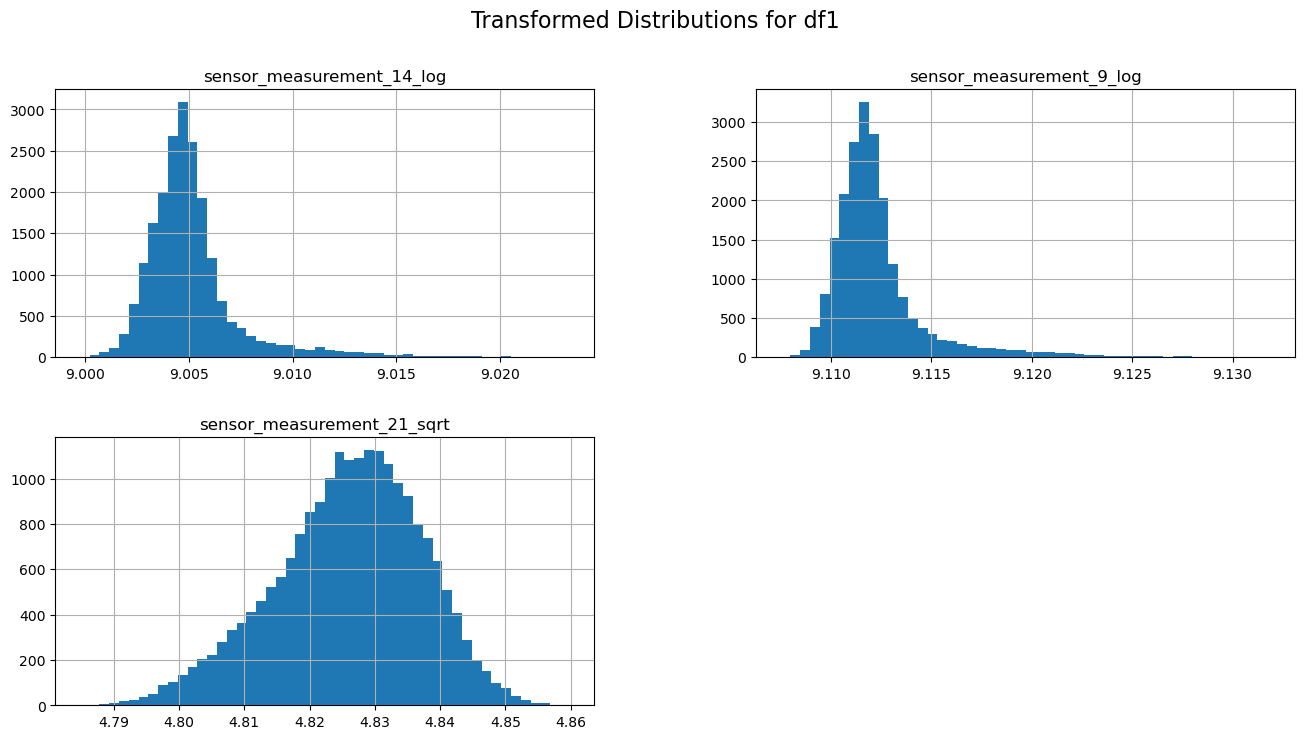

In [44]:
# Function to apply appropriate transformations to specified columns
def apply_transformations(df, columns):
    transformed_columns = {}
    for column in columns:
        if df[column].skew() > 0:  # Right skew
            transformed_column_name = column + '_log'
            df[transformed_column_name] = np.log1p(df[column].abs())
            transformed_columns[column] = transformed_column_name
        elif df[column].skew() < 0:  # Left skew
            transformed_column_name = column + '_sqrt'
            df[transformed_column_name] = np.sqrt(df[column])  # Apply log transformation after taking absolute value
            transformed_columns[column] = transformed_column_name
        df.drop(column, axis=1, inplace=True)  # Drop original column
    return transformed_columns

# Columns with skewness issues
columns_to_transform = [ 'sensor_measurement_14', 'sensor_measurement_9', 'sensor_measurement_21']

# Apply transformations and store transformed column names
df1_transform = apply_transformations(df1, columns_to_transform)
df1t_transform = apply_transformations(df1t, columns_to_transform)

# Plot transformed distributions for df3
plt.figure(figsize=(16, 8))
df1[list(df1_transform.values())].hist(bins=50, figsize=(16, 8))
plt.suptitle('Transformed Distributions for df1', fontsize=16)
plt.show()

In [45]:
df1

time_in_cycles  operational_setting_1  sensor_measurement_2  \
0                   1                 -0.001               641.820   
1                   2                  0.002               642.150   
2                   3                 -0.004               642.350   
3                   4                  0.001               642.350   
4                   5                 -0.002               642.370   
...               ...                    ...                   ...   
20626             196                 -0.000               643.490   
20627             197                 -0.002               643.540   
20628             198                  0.000               643.420   
20629             199                 -0.001               643.230   
20630             200                 -0.003               643.850   

       sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0                  1589.700              1400.600               554.360   
1                  1591.820              1403.140               553.750   
2                  1587.990              1404.200               554.260   
3                  1582.790              1401.870               554.450   
4                  1582.850              1406.220               554.000   
...                     ...                   ...                   ...   
20626              1597.980              1428.630               551.430   
20627              1604.500              1433.580               550.860   
20628              1602.460              1428.180               550.940   
20629              1605.260              1426.530               550.680   
20630              1600.380              1432.140               550.790   

       sensor_measurement_8  sensor_measurement_11  sensor_measurement_12  \
0                  2388.060                 47.470                521.660   
1                  2388.040                 47.490                522.280   
2                  2388.080                 47.270                522.420   
3                  2388.110                 47.130                522.860   
4                  2388.060                 47.280                522.190   
...                     ...                    ...                    ...   
20626              2388.190                 48.070                519.490   
20627              2388.230                 48.040                519.680   
20628              2388.240                 48.090                520.010   
20629              2388.250                 48.390                519.670   
20630              2388.260                 48.200                519.300   

       sensor_measurement_13  sensor_measurement_15  sensor_measurement_17  \
0                   2388.020                  8.419                    392   
1                   2388.070                  8.432                    392   
2                   2388.030                  8.418                    390   
3                   2388.080                  8.368                    392   
4                   2388.040                  8.429                    393   
...                      ...                    ...                    ...   
20626               2388.260                  8.496                    397   
20627               2388.220                  8.514                    395   
20628               2388.240                  8.565                    398   
20629               2388.230                  8.539                    395   
20630               2388.260                  8.504                    396   

       sensor_measurement_20  RUL  sensor_measurement_14_log  \
0                     39.060  191                      9.004   
1                     39.000  190                      9.004   
2                     38.950  189                      9.004   
3                     38.880  188                      9.004   
4                     38.900  187                      9.004   
...                

In [46]:
df1t

time_in_cycles  operational_setting_1  sensor_measurement_2  \
0                   1                  0.002               643.020   
1                   2                 -0.003               641.710   
2                   3                  0.000               642.460   
3                   4                  0.004               642.440   
4                   5                  0.001               642.510   
...               ...                    ...                   ...   
13091             194                  0.005               643.240   
13092             195                 -0.001               643.220   
13093             196                 -0.001               643.440   
13094             197                 -0.004               643.260   
13095             198                  0.001               642.950   

       sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0                  1585.290              1398.210               553.900   
1                  1588.450              1395.420               554.850   
2                  1586.940              1401.340               554.110   
3                  1584.120              1406.420               554.070   
4                  1587.190              1401.920               554.160   
...                     ...                   ...                   ...   
13091              1599.450              1415.790               553.410   
13092              1595.690              1422.050               553.220   
13093              1593.150              1406.820               553.040   
13094              1594.990              1419.360               553.370   
13095              1601.620              1424.990               552.480   

       sensor_measurement_8  sensor_measurement_11  sensor_measurement_12  \
0                  2388.040                 47.200                521.720   
1                  2388.010                 47.500                522.160   
2                  2388.050                 47.500                521.970   
3                  2388.030                 47.280                521.380   
4                  2388.010                 47.310                522.150   
...                     ...                    ...                    ...   
13091              2388.020                 47.690                520.690   
13092              2388.050                 47.600                521.050   
13093              2388.110                 47.570                521.180   
13094              2388.070                 47.610                521.330   
13095              2388.060                 47.800                521.070   

       sensor_measurement_13  sensor_measurement_15  sensor_measurement_17  \
0                   2388.030                  8.405                    392   
1                   2388.060                  8.380                    393   
2                   2388.030                  8.444                    393   
3                   2388.050                  8.392                    391   
4                   2388.030                  8.403                    390   
...                      ...                    ...                    ...   
13091               2388.000                  8.472                    394   
13092               2388.090                  8.451                    395   
13093               2388.040                  8.457                    395   
13094               2388.080                  8.471                    395   
13095               2388.050                  8.490                    396   

       sensor_measurement_20  RUL  sensor_measurement_14_log  \
0                     38.860  142                      9.003   
1                     39.020  141                      9.005   
2                     39.080  140                      9.003   
3                     39.000  139                      9.004   
4                     38.990  138                      9.003   
...                

### DF3, DF3T

<Figure size 1600x800 with 0 Axes>

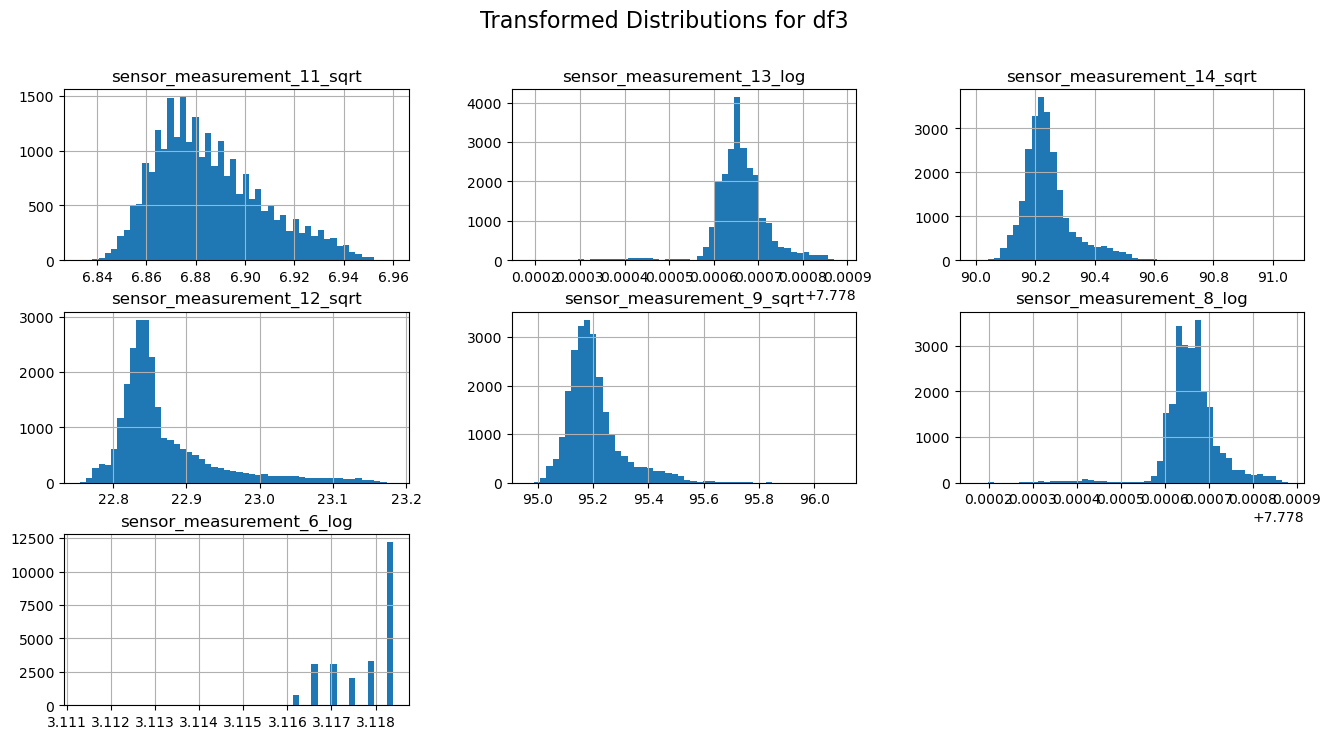

In [47]:
# Function to apply appropriate transformations to specified columns
def apply_transformations(df, columns):
    transformed_columns = {}
    for column in columns:
        if df[column].skew() > 0: 
            transformed_column_name = column + '_sqrt'
            df[transformed_column_name] = np.sqrt(df[column])
            transformed_columns[column] = transformed_column_name
        elif df[column].skew() < 0:
            transformed_column_name = column + '_log'
            df[transformed_column_name] = np.log1p(df[column].abs())  # Apply log transformation after taking absolute value
            transformed_columns[column] = transformed_column_name
        df.drop(column, axis=1, inplace=True)  # Drop original column
    return transformed_columns

# Columns with skewness issues
columns_to_transform = ['sensor_measurement_11', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_12', 'sensor_measurement_9', 'sensor_measurement_8', 'sensor_measurement_6']

# Apply transformations and store transformed column names
df3_transform = apply_transformations(df3, columns_to_transform)
df3t_transform = apply_transformations(df3t, columns_to_transform)

# Plot transformed distributions for df3
plt.figure(figsize=(16, 8))
df3[list(df3_transform.values())].hist(bins=50, figsize=(16, 8))
plt.suptitle('Transformed Distributions for df3', fontsize=16)
plt.show()

## Transformations complete
The pair of df1 and df3 are not perfect, but they are better. For the most part, df1, df3, df1t, and df3t are cleaned up and ready to go for modeling. The second and forth pairs, we will use dimension reduction to clean those up a bit since there is such a high correlation between predictors in those data sets.

In [48]:
df3

time_in_cycles  operational_setting_1  sensor_measurement_2  \
0                   1                 -0.001               642.360   
1                   2                  0.001               642.500   
2                   3                 -0.001               642.180   
3                   4                 -0.002               642.920   
4                   5                  0.002               641.680   
...               ...                    ...                   ...   
24715             148                 -0.002               643.780   
24716             149                  0.003               643.290   
24717             150                 -0.002               643.840   
24718             151                 -0.002               643.940   
24719             152                  0.000               643.640   

       sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0                  1583.230              1396.840               553.970   
1                  1584.690              1396.890               554.550   
2                  1582.350              1405.610               554.430   
3                  1585.610              1392.270               555.210   
4                  1588.630              1397.650               554.740   
...                     ...                   ...                   ...   
24715              1596.010              1424.110               551.860   
24716              1596.380              1429.140               551.860   
24717              1604.530              1431.410               551.300   
24718              1597.560              1426.570               550.690   
24719              1599.040              1436.060               550.960   

       sensor_measurement_10  sensor_measurement_15  sensor_measurement_17  \
0                      1.300                  8.425                    391   
1                      1.300                  8.440                    392   
2                      1.300                  8.390                    391   
3                      1.300                  8.388                    392   
4                      1.300                  8.387                    392   
...                      ...                    ...                    ...   
24715                  1.300                  8.504                    394   
24716                  1.300                  8.517                    395   
24717                  1.300                  8.522                    396   
24718                  1.300                  8.515                    395   
24719                  1.300                  8.515                    396   

       sensor_measurement_20  sensor_measurement_21  RUL  \
0                     39.110                 23.354  258   
1                     38.990                 23.449  257   
2                     38.850                 23.367  256   
3                     38.960                 23.295  255   
4                     39.140                 23.458  254   
...                      ...                    ...  ...   
24715                 38.440                 22.963    4   
24716                 38.500                 22.975    3   
24717                 38.390                 23.068    2   
24718                 38.310                 23.075    1   
24719                 38.560                 23.085    0   

       sensor_measurement_11_sqrt  sensor_measurement_13_log  \
0                           6.877                      7.779   
1                           6.872                      7.779   
2                           6.872                      7.779   
3                           6.873                      7.779   
4                           6.867                      7.779   
...                           ...                        ...   
24715                       6.948                      7.779   
24716                       6.938                      7.779   
24717                       6.9

In [49]:
df3t

time_in_cycles  operational_setting_1  sensor_measurement_2  \
0                   1                 -0.002               641.940   
1                   2                  0.001               642.020   
2                   3                  0.001               641.680   
3                   4                  0.003               642.200   
4                   5                 -0.000               642.460   
...               ...                    ...                   ...   
16591             243                  0.001               643.040   
16592             244                 -0.002               642.470   
16593             245                 -0.005               642.700   
16594             246                 -0.001               642.190   
16595             247                  0.002               643.190   

       sensor_measurement_3  sensor_measurement_4  sensor_measurement_7  \
0                  1581.930              1396.930               554.560   
1                  1584.860              1398.900               554.100   
2                  1581.780              1391.920               554.410   
3                  1584.530              1395.340               554.580   
4                  1589.030              1395.860               554.160   
...                     ...                   ...                   ...   
16591              1594.990              1411.280               561.210   
16592              1591.270              1417.640               561.020   
16593              1593.810              1412.700               561.160   
16594              1595.630              1406.580               562.660   
16595              1592.540              1407.200               562.320   

       sensor_measurement_10  sensor_measurement_15  sensor_measurement_17  \
0                      1.300                  8.376                    391   
1                      1.300                  8.406                    391   
2                      1.300                  8.355                    391   
3                      1.300                  8.371                    392   
4                      1.300                  8.415                    391   
...                      ...                    ...                    ...   
16591                  1.310                  8.294                    395   
16592                  1.310                  8.325                    394   
16593                  1.310                  8.326                    394   
16594                  1.310                  8.291                    395   
16595                  1.310                  8.319                    392   

       sensor_measurement_20  sensor_measurement_21  RUL  \
0                     39.070                 23.447  276   
1                     39.040                 23.481  275   
2                     39.100                 23.424  274   
3                     38.970                 23.478  273   
4                     39.090                 23.395  272   
...                      ...                    ...  ...   
16591                 39.400                 23.495   32   
16592                 39.420                 23.601   31   
16593                 39.430                 23.548   30   
16594                 39.400                 23.669   29   
16595                 39.410                 23.654   28   

       sensor_measurement_11_sqrt  sensor_measurement_13_log  \
0                           6.862                      7.779   
1                           6.861                      7.779   
2                           6.867                      7.779   
3                           6.875                      7.779   
4                           6.851                      7.779   
...                           ...                        ...   
16591                       6.900                      7.779   
16592                       6.910                      7.779   
16593                       6.8

## PCA for df2, df2t, df4, df4t

In [50]:
from sklearn.decomposition import PCA
# Extract RUL column from each DataFrame
rul_df2 = df2['RUL']
rul_df2t = df2t['RUL']
rul_df4 = df4['RUL']
rul_df4t = df4t['RUL']

# Remove RUL column from each DataFrame
df2.drop(columns=['RUL'], inplace=True)
df2t.drop(columns=['RUL'], inplace=True)
df4.drop(columns=['RUL'], inplace=True)
df4t.drop(columns=['RUL'], inplace=True)

# Step 2: Perform PCA on df2, df4
pca2 = PCA(n_components=0.99)  # Retain components that explain at least 95% of variance
pca4 = PCA(n_components=0.99)  # Retain components that explain at least 95% of variance

# Fit PCA on df2 and df4
pca2.fit(df2)
pca4.fit(df4)

# Step 3: Transform training and testing datasets
df2_pca = pca2.transform(df2)
df2t_pca = pca2.transform(df2t)
df4_pca = pca4.transform(df4)
df4t_pca = pca4.transform(df4t)

In [51]:
num_pcas_df2 = df2_pca.shape[1]
num_pcas_df2t = df2t_pca.shape[1]
print(f'DF2: {num_pcas_df2}\nDF2t: {num_pcas_df2t}')

DF2: 3
DF2t: 3


In [52]:
num_pcas_df4 = df4_pca.shape[1]
num_pcas_df4t = df4t_pca.shape[1]
print(f'DF4: {num_pcas_df4}\nDF4t: {num_pcas_df4t}')

DF4: 3
DF4t: 3


In [53]:
# Get the explained variance ratio and principal component loadings for df2
explained_variance_ratio_df2 = pca2.explained_variance_ratio_
principal_components_df2 = pca2.components_

# Get the explained variance ratio and principal component loadings for df4
explained_variance_ratio_df4 = pca4.explained_variance_ratio_
principal_components_df4 = pca4.components_

# Print the explained variance ratio for df2
print("Explained Variance Ratio for df2:")
for i, explained_variance in enumerate(explained_variance_ratio_df2, 1):
    print(f"Principal Component {i}: {explained_variance:.4f}")

# Print the explained variance ratio for df4
print("\nExplained Variance Ratio for df4:")
for i, explained_variance in enumerate(explained_variance_ratio_df4, 1):
    print(f"Principal Component {i}: {explained_variance:.4f}")

# Print the loadings of the first principal component for df2
print("\nLoadings of the First Principal Component for df2:")
loadings_df2 = principal_components_df2[0]
for feature_name, loading in zip(df2.columns, loadings_df2):
    print(f"{feature_name}: {loading:.4f}")
    
print("\nLoadings of the Second Principal Component for df2:")
loadings_df2 = principal_components_df2[1]
for feature_name, loading in zip(df2.columns, loadings_df2):
    print(f"{feature_name}: {loading:.4f}")

# Print the loadings of the first principal component for df4
print("\nLoadings of the First Principal Component for df4:")
loadings_df4 = principal_components_df4[0]
for feature_name, loading in zip(df4.columns, loadings_df4):
    print(f"{feature_name}: {loading:.4f}")
    
    
print("\nLoadings of the Second Principal Component for df4:")
loadings_df4 = principal_components_df4[1]
for feature_name, loading in zip(df4.columns, loadings_df4):
    print(f"{feature_name}: {loading:.4f}")

Explained Variance Ratio for df2:
Principal Component 1: 0.8762
Principal Component 2: 0.0997
Principal Component 3: 0.0192

Explained Variance Ratio for df4:
Principal Component 1: 0.8653
Principal Component 2: 0.0984
Principal Component 3: 0.0317

Loadings of the First Principal Component for df2:
time_in_cycles: 0.0023
operational_setting_1: -0.0233
operational_setting_2: -0.0005
operational_setting_3: 0.0206
sensor_measurement_1: 0.0466
sensor_measurement_2: 0.0765
sensor_measurement_3: 0.2242
sensor_measurement_4: 0.2484
sensor_measurement_5: 0.0062
sensor_measurement_6: 0.0098
sensor_measurement_7: 0.2802
sensor_measurement_8: 0.2861
sensor_measurement_9: 0.7123
sensor_measurement_10: 0.0003
sensor_measurement_11: 0.0067
sensor_measurement_12: 0.2643
sensor_measurement_13: 0.1851
sensor_measurement_14: 0.1449
sensor_measurement_15: -0.0015
sensor_measurement_16: 0.0000
sensor_measurement_17: 0.0587
sensor_measurement_18: 0.2862
sensor_measurement_19: 0.0077
sensor_measurement_20:

# Modeling
### df2

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, BayesianRidge, RANSACRegressor, OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2, weights='uniform'),
    KNeighborsRegressor(n_neighbors=6, weights='uniform'),
    KNeighborsRegressor(n_neighbors=25, weights='uniform'),
    DecisionTreeRegressor(max_depth=3),
    DecisionTreeRegressor(max_depth=10),
    RandomForestRegressor(n_estimators=100, max_depth=3),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    RandomForestRegressor(n_estimators=100, max_depth=15),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10),
    HuberRegressor(),
    PassiveAggressiveRegressor(),
    Ridge(alpha=1.0),
    Ridge(alpha=5),
    Ridge(alpha=10),
    Ridge(alpha=50),
    Lasso(alpha=1.0),
    Lasso(alpha=5),
    Lasso(alpha=10),
    Lasso(alpha=50),
    ElasticNet(alpha=1.0),
    XGBRegressor(),
    LGBMRegressor(),
    BayesianRidge()
    # CatBoostRegressor(),
    # AdaBoostRegressor(),
    # GaussianProcessRegressor(),
    # IsotonicRegression(),  
    # OrthogonalMatchingPursuit(),
    # RANSACRegressor()
    # SVR(kernel='linear'),
    # SVR(kernel='rbf'),
]

In [55]:
from sklearn.metrics import mean_squared_error

# Iterate through models
for m in models:
    print(m)  # Print the name of the model
    m.fit(df2_pca, rul_df2)
    
    # Predictions
    y_train_pred = m.predict(df2_pca)
    y_test_pred = m.predict(df2t_pca)
    
    # Model evaluation
    mse_train = mean_squared_error(rul_df2, y_train_pred)
    mse_test = mean_squared_error(rul_df2t, y_test_pred)
    
    # Print results
    print(f'MSE (train):  {mse_train}')
    print(f'MSE (test):   {mse_test}')
    print()

LinearRegression()
MSE (train):  2214.6128310593276
MSE (test):   2623.0768393656167

KNeighborsRegressor(n_neighbors=2)
MSE (train):  810.9616017783069
MSE (test):   3065.9349460151216

KNeighborsRegressor(n_neighbors=6)
MSE (train):  1352.4302468217209
MSE (test):   2477.1694222980595

KNeighborsRegressor(n_neighbors=25)
MSE (train):  1614.4546611358103
MSE (test):   2313.353128063311

DecisionTreeRegressor(max_depth=3)
MSE (train):  2027.8597139405804
MSE (test):   2598.676905536794

DecisionTreeRegressor(max_depth=10)
MSE (train):  1705.4304733941483
MSE (test):   2505.142508724788

RandomForestRegressor(max_depth=3)
MSE (train):  2009.9084750187687
MSE (test):   2574.9607817543592

RandomForestRegressor(max_depth=10)
MSE (train):  1609.6099687643493
MSE (test):   2362.2662396857227

RandomForestRegressor(max_depth=15)
MSE (train):  1043.0926194413553
MSE (test):   2266.859682932681

GradientBoostingRegressor(max_depth=5)
MSE (train):  1578.7355640412397
MSE (test):   2244.41951253

In [56]:
# Instantiate the LGBMRegressor model
model = LGBMRegressor()

# Fit the model on the training data
model.fit(df2_pca, rul_df2)

# Predictions on training and testing data
y_train_pred = model.predict(df2_pca)
y_test_pred = model.predict(df2t_pca)

# Model evaluation
mse_train = mean_squared_error(rul_df2, y_train_pred)
mse_test = mean_squared_error(rul_df2t, y_test_pred)
r2_train = r2_score(rul_df2, y_train_pred)
r2_test = r2_score(rul_df2t, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# Print results
print("LGBMRegressor Model:")
print(f'MSE (train):  {mse_train}')
print(f'MSE (test):   {mse_test}')
print(f'R-squared (train):  {r2_train}')
print(f'R-squared (test):   {r2_test}')
print(f'RMSE (train):  {rmse_train}')
print(f'RMSE (test):   {rmse_test}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 53759, number of used features: 3
[LightGBM] [Info] Start training from score 108.154746
LGBMRegressor Model:
MSE (train):  1559.3728012996958
MSE (test):   2210.2605080171925
R-squared (train):  0.6741709671733331
R-squared (test):   0.4582444913091105
RMSE (train):  39.48889465786167
RMSE (test):   47.01340774733515


### df1

In [57]:
y = df1['RUL']
X = df1.drop(['RUL'], axis = 1)

In [58]:
from sklearn.metrics import mean_squared_error

# Iterate through models
for m in models:
    print(m)  # Print the name of the model
    m.fit(X, y)
    
    # Predictions
    y_train_pred = m.predict(X)
    y_test_pred = m.predict(df1t.drop(['RUL'], axis=1))
    
    # Model evaluation
    mse_train = mean_squared_error(y, y_train_pred)
    mse_test = mean_squared_error(df1t['RUL'], y_test_pred)
    
    
    
    # Print results
    print(f'MSE (train):  {mse_train}')
    print(f'MSE (test):   {mse_test}')
    print()

LinearRegression()
MSE (train):  1634.8663586787472
MSE (test):   1837.4497740393645

KNeighborsRegressor(n_neighbors=2)
MSE (train):  717.6960035868353
MSE (test):   2688.754161576054

KNeighborsRegressor(n_neighbors=6)
MSE (train):  1202.4611641596518
MSE (test):   2059.462751561121

KNeighborsRegressor(n_neighbors=25)
MSE (train):  1388.654443740003
MSE (test):   1853.8594224801463

DecisionTreeRegressor(max_depth=3)
MSE (train):  1602.7210462331243
MSE (test):   1910.8656674509111

DecisionTreeRegressor(max_depth=10)
MSE (train):  979.5744383294887
MSE (test):   2205.3728994218714

RandomForestRegressor(max_depth=3)
MSE (train):  1527.844646153728
MSE (test):   1843.7749014250119

RandomForestRegressor(max_depth=10)
MSE (train):  859.2133823577633
MSE (test):   1686.8752312025638

RandomForestRegressor(max_depth=15)
MSE (train):  372.44443921739077
MSE (test):   1704.9135249805122

GradientBoostingRegressor(max_depth=5)
MSE (train):  1051.5594751149304
MSE (test):   1692.7040149575

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [59]:
# Instantiate the RandomForestRegressor model with max_depth=10
model = RandomForestRegressor(max_depth=10)

# Fit the model on the training data
model.fit(X, y)

# Predictions on training and testing data
y_train_pred = model.predict(X)
y_test_pred = model.predict(df1t.drop(['RUL'], axis=1))

# Model evaluation
mse_train = mean_squared_error(y, y_train_pred)
mse_test = mean_squared_error(df1t['RUL'], y_test_pred)

# R-squared for training and testing data
r2_train = r2_score(y, y_train_pred)
r2_test = r2_score(df1t['RUL'], y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Print results
print("RandomForestRegressor Model:")
print(f'MSE (train):  {mse_train}')
print(f'MSE (test):   {mse_test}')
print(f'R-squared (train):  {r2_train}')
print(f'R-squared (test):   {r2_test}')
print(f'RMSE (train):  {rmse_train}')
print(f'RMSE (test):   {rmse_test}')
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

RandomForestRegressor Model:
MSE (train):  861.3772122950808
MSE (test):   1682.804301238733
R-squared (train):  0.8184418844926421
R-squared (test):   0.516211477842694
RMSE (train):  29.349228478702482
RMSE (test):   41.021997772399295
Feature Importances:
time_in_cycles: 0.6503387636451772
operational_setting_1: 0.006294036739958076
sensor_measurement_2: 0.008813217238370391
sensor_measurement_3: 0.008637969636138002
sensor_measurement_4: 0.021207569138411726
sensor_measurement_7: 0.013496393732655178
sensor_measurement_8: 0.00744781792921965
sensor_measurement_11: 0.17100290732421344
sensor_measurement_12: 0.022577057567753002
sensor_measurement_13: 0.006789899705998239
sensor_measurement_15: 0.012099628954915979
sensor_measurement_17: 0.0027074846955716663
sensor_measurement_20: 0.006286373310231266
sensor_measurement_14_log: 0.015482863039198875
sensor_measurement_9_log: 0.03661444049813498
sensor_measurement_21_sqrt: 0.010203576844052322


## DF3

In [60]:
y = df3['RUL']
X = df3.drop(['RUL'], axis = 1)

In [61]:
# Iterate through models
for m in models:
    print(m)  # Print the name of the model
    m.fit(X, y)
    
    # Predictions
    y_train_pred = m.predict(X)
    y_test_pred = m.predict(df3t.drop(['RUL'], axis=1))
    
    # Model evaluation
    mse_train = mean_squared_error(y, y_train_pred)
    mse_test = mean_squared_error(df3t['RUL'], y_test_pred)
    
    
    
    # Print results
    print(f'MSE (train):  {mse_train}')
    print(f'MSE (test):   {mse_test}')
    print()

LinearRegression()
MSE (train):  3755.4798793338705
MSE (test):   4652.475127172671

KNeighborsRegressor(n_neighbors=2)
MSE (train):  1597.0092637540454
MSE (test):   6699.037433718969

KNeighborsRegressor(n_neighbors=6)
MSE (train):  2735.0354975728155
MSE (test):   5087.684271310355

KNeighborsRegressor(n_neighbors=25)
MSE (train):  3343.6204139805823
MSE (test):   4507.786790455531

DecisionTreeRegressor(max_depth=3)
MSE (train):  3901.034640369301
MSE (test):   5335.825924454444

DecisionTreeRegressor(max_depth=10)
MSE (train):  2075.681776109215
MSE (test):   5315.118127437649

RandomForestRegressor(max_depth=3)
MSE (train):  3752.0548655386574
MSE (test):   5214.849412513334

RandomForestRegressor(max_depth=10)
MSE (train):  1820.633254300366
MSE (test):   4420.222475496981

RandomForestRegressor(max_depth=15)
MSE (train):  747.8752670920635
MSE (test):   4509.9556069921355

GradientBoostingRegressor(max_depth=5)
MSE (train):  1993.1274904094473
MSE (test):   4335.615776524523

G

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [62]:
# Instantiate the GradientBoostingRegressor model with max_depth=5
model = GradientBoostingRegressor(max_depth=5)

# Fit the model on the training data
model.fit(X, y)

# Predictions on training and testing data
y_train_pred = model.predict(X)
y_test_pred = model.predict(df3t.drop(['RUL'], axis=1))

# Model evaluation
mse_train = mean_squared_error(y, y_train_pred)
mse_test = mean_squared_error(df3t['RUL'], y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
# R-squared for training and testing data
r2_train = r2_score(y, y_train_pred)
r2_test = r2_score(df3t['RUL'], y_test_pred)

# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Print results
print("GradientBoostingRegressor Model:")
print(f'MSE (train):  {mse_train}')
print(f'MSE (test):   {mse_test}')
print(f'R-squared (train):  {r2_train}')
print(f'R-squared (test):   {r2_test}')
print(f'RMSE (train):  {rmse_train}')
print(f'RMSE (test):   {rmse_test}')
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

GradientBoostingRegressor Model:
MSE (train):  1993.1274904094473
MSE (test):   4333.290359401841
R-squared (train):  0.7960007766312507
R-squared (test):   0.3891404669262234
RMSE (train):  44.64445643536773
RMSE (test):   65.8277324491877
Feature Importances:
time_in_cycles: 0.18779390905647533
operational_setting_1: 0.001917144476000781
sensor_measurement_2: 0.005338305534872689
sensor_measurement_3: 0.012012680624992243
sensor_measurement_4: 0.09958986118874386
sensor_measurement_7: 0.028826108846454507
sensor_measurement_10: 0.0
sensor_measurement_15: 0.004723781282174559
sensor_measurement_17: 0.011963650909232265
sensor_measurement_20: 0.002433231774211115
sensor_measurement_21: 0.004068943815256262
sensor_measurement_11_sqrt: 0.3853755608900735
sensor_measurement_13_log: 0.016517722125078817
sensor_measurement_14_sqrt: 0.024330901389942768
sensor_measurement_12_sqrt: 0.11489722943311144
sensor_measurement_9_sqrt: 0.028495482646668253
sensor_measurement_8_log: 0.0098077205932703

## DF4

In [63]:
for m in models:
    print(m)  # Print the name of the model
    m.fit(df4_pca, rul_df4)
    
    # Predictions
    y_train_pred = m.predict(df4_pca)
    y_test_pred = m.predict(df4t_pca)
    
    # Model evaluation
    mse_train = mean_squared_error(rul_df4, y_train_pred)
    mse_test = mean_squared_error(rul_df4t, y_test_pred)
    
    # Print results
    print(f'MSE (train):  {mse_train}')
    print(f'MSE (test):   {mse_test}')
    print()

LinearRegression()
MSE (train):  5026.2655877075495
MSE (test):   8579.767515110401

KNeighborsRegressor(n_neighbors=2)
MSE (train):  1543.117471305654
MSE (test):   7527.971350754598

KNeighborsRegressor(n_neighbors=6)
MSE (train):  2585.2700951126635
MSE (test):   6377.895527679376

KNeighborsRegressor(n_neighbors=25)
MSE (train):  3109.298799693056
MSE (test):   6105.607812529723

DecisionTreeRegressor(max_depth=3)
MSE (train):  4686.062426859751
MSE (test):   8510.345781576641

DecisionTreeRegressor(max_depth=10)
MSE (train):  3603.5521989093922
MSE (test):   7338.928269816517

RandomForestRegressor(max_depth=3)
MSE (train):  4629.947504469232
MSE (test):   8428.673185890235

RandomForestRegressor(max_depth=10)
MSE (train):  3334.3032410424153
MSE (test):   6897.122630139772

RandomForestRegressor(max_depth=15)
MSE (train):  2039.8389326945835
MSE (test):   6056.576956893018

GradientBoostingRegressor(max_depth=5)
MSE (train):  2970.9741176516886
MSE (test):   5952.293662096555

Gr

In [64]:
# Instantiate the LGBMRegressor model
model = LGBMRegressor()

# Fit the model on the training data
model.fit(df4_pca, rul_df4)

# Predictions on training and testing data
y_train_pred = model.predict(df4_pca)
y_test_pred = model.predict(df4t_pca)

# Model evaluation
mse_train = mean_squared_error(rul_df4, y_train_pred)
mse_test = mean_squared_error(rul_df4t, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(rul_df4, y_train_pred)
r2_test = r2_score(rul_df4t, y_test_pred)


# Print results
print("LGBMRegressor Model:")
print(f'MSE (train):  {mse_train}')
print(f'MSE (test):   {mse_test}')
print(f'R-squared (train):  {r2_train}')
print(f'R-squared (test):   {r2_test}')
print(f'RMSE (train):  {rmse_train}')
print(f'RMSE (test):   {rmse_test}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 61249, number of used features: 3
[LightGBM] [Info] Start training from score 133.311417
LGBMRegressor Model:
MSE (train):  2962.309519416125
MSE (test):   5845.658861786126
R-squared (train):  0.6325099946702685
R-squared (test):   0.3118627930738259
RMSE (train):  54.42710280196921
RMSE (test):   76.45690852883162
